# Importing required libraries

In [55]:
!pip install pymysql
!pip install sqlalchemy
import pandas as pd
import numpy as np

import pymysql                        # for getting data from a SQL database
from sqlalchemy import create_engine  # for establishing the connection and authentication
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading csv extracted from Pokertracker 4

In [2]:

poker_data_df = pd.read_csv('poker_players_stats.csv')
poker_data_df

,Player,Hands,All-In Adj BB,All-In Adj BB/100,My C All-In Adj,VPIP,PFR,Call Any PFR,3Bet PF,Fold to 3Bet,...,CBet R,Fold to F CBet,Fold to T CBet,Fold to R CBet,XR Flop,XR Turn,XR River,Fold to F XR,Fold to T XR,Fold to R XR
0,kozirek,"61,838","5,286.24",8.55,"$1,321.56",22.52,18.55,10.83,8.32,76.27,...,49.56,38.52,39.21,42.86,13.23,9.52,5.19,43.72,49.38,52.63
1,npAaL,"53,022","2,583.04",4.87,$645.76,17.10,14.14,8.40,6.40,80.10,...,49.62,52.82,38.78,57.69,9.23,8.69,5.97,33.33,35.71,38.46
2,tukeiron,"49,593",-859.00,-1.73,-$214.75,24.00,19.60,12.26,7.69,76.47,...,41.81,39.88,45.28,38.46,8.43,3.33,2.63,50.74,52.50,75.00
3,Hamjhito,"49,279","-1,529.24",-3.10,-$382.31,21.14,16.10,12.86,6.30,78.16,...,51.28,49.09,39.79,47.78,6.29,6.41,4.04,35.23,30.30,54.55
4,JasonMerccie,"44,865",82.00,0.18,$20.50,21.74,18.53,9.29,9.19,78.58,...,54.25,39.66,42.36,39.44,10.88,5.49,2.32,36.84,47.37,61.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13853,Ljg11,1,4.76,476.00,$1.19,100.00,0.00,100.00,0.00,-,...,-,-,-,-,-,-,-,-,-,-
13854,xavi66,1,0.00,0.00,$0.00,0.00,0.00,-,-,-,...,-,-,-,-,-,-,-,-,-,-
13855,PHÖNIX90,1,-1.00,-100.00,-$0.25,0.00,0.00,0.00,-,100.00,...,-,-,-,-,-,-,-,-,-,-
13856,IcanDodgeYou,1,-65.72,"-6,572.00",-$16.43,100.00,100.00,-,-,-,...,-,-,-,-,-,-,-,-,-,-


# Importing DataFrame Data into MySQL Table
In this step, I'll insert the data from my .csv file into a MySQL table using Python in JupyterLab.
Although I'll primarily work with the data in JupyterLab, I'll also demonstrate the process of storing it in MySQL.
This is necessary as part of the project requirements.
Once the data is imported and stored in the MySQL table, I'll provide evidence of successful storage.
This allows us to utilize the data seamlessly for further analysis and processing.

In [3]:


from getpass import getpass  # To get the password without showing the input
password = getpass()
connection_string = 'mysql+pymysql://root:' + password + '@localhost/poker_players_data_schema'
engine = create_engine(connection_string)
type(engine)


 ········


sqlalchemy.engine.base.Engine

In [4]:

table_name = 'poker_players_stats'
poker_data_df.to_sql(table_name, con=engine, if_exists='replace', index=False)


13858

In [5]:
# Writting SQL query
query = 'SELECT * FROM poker_players_stats'

# Executing the query and storing the result in a DataFrame
sql_data = pd.read_sql_query(query, engine)

# Display the first few rows of the DataFrame
sql_data.head()

,Player,Hands,All-In Adj BB,All-In Adj BB/100,My C All-In Adj,VPIP,PFR,Call Any PFR,3Bet PF,Fold to 3Bet,...,CBet R,Fold to F CBet,Fold to T CBet,Fold to R CBet,XR Flop,XR Turn,XR River,Fold to F XR,Fold to T XR,Fold to R XR
0,kozirek,"61,838","5,286.24",8.55,"$1,321.56",22.52,18.55,10.83,8.32,76.27,...,49.56,38.52,39.21,42.86,13.23,9.52,5.19,43.72,49.38,52.63
1,npAaL,"53,022","2,583.04",4.87,$645.76,17.10,14.14,8.40,6.40,80.10,...,49.62,52.82,38.78,57.69,9.23,8.69,5.97,33.33,35.71,38.46
2,tukeiron,"49,593",-859.00,-1.73,-$214.75,24.00,19.60,12.26,7.69,76.47,...,41.81,39.88,45.28,38.46,8.43,3.33,2.63,50.74,52.50,75.00
3,Hamjhito,"49,279","-1,529.24",-3.10,-$382.31,21.14,16.10,12.86,6.30,78.16,...,51.28,49.09,39.79,47.78,6.29,6.41,4.04,35.23,30.30,54.55
4,JasonMerccie,"44,865",82.00,0.18,$20.50,21.74,18.53,9.29,9.19,78.58,...,54.25,39.66,42.36,39.44,10.88,5.49,2.32,36.84,47.37,61.90


# Cleaning /Wrangling
Change headers names.
Deal with NaN values.
Categorical Features.
Numerical Features.


In [6]:
# Replace spaces and slashes with underscores, and convert to lowercase
poker_data_df.columns = poker_data_df.columns.str.replace(' ', '_').str.replace('/', '_').str.lower()

poker_data_df.columns


Index(['player', 'hands', 'all-in_adj_bb', 'all-in_adj_bb_100',
       'my_c_all-in_adj', 'vpip', 'pfr', 'call_any_pfr', '3bet_pf',
       'fold_to_3bet', '4bet_pf', 'fold_to_4bet+', 'limp', 'total_af',
       'cbet_f', 'cbet_t', 'cbet_r', 'fold_to_f_cbet', 'fold_to_t_cbet',
       'fold_to_r_cbet', 'xr_flop', 'xr_turn', 'xr_river', 'fold_to_f_xr',
       'fold_to_t_xr', 'fold_to_r_xr'],
      dtype='object')

In [7]:
#checking data types
poker_data_df.dtypes

player               object
hands                object
all-in_adj_bb        object
all-in_adj_bb_100    object
my_c_all-in_adj      object
vpip                 object
pfr                  object
call_any_pfr         object
3bet_pf              object
fold_to_3bet         object
4bet_pf              object
fold_to_4bet+        object
limp                 object
total_af             object
cbet_f               object
cbet_t               object
cbet_r               object
fold_to_f_cbet       object
fold_to_t_cbet       object
fold_to_r_cbet       object
xr_flop              object
xr_turn              object
xr_river             object
fold_to_f_xr         object
fold_to_t_xr         object
fold_to_r_xr         object
dtype: object

##### All my columns seem to be object, i want to convert them all to numerical, so i will need to replace the commas, and $ sign ##### from them all and then convert to numeric

In [8]:


# Columns to convert
columns_to_convert = ['hands', 'all-in_adj_bb', 'all-in_adj_bb_100', 'my_c_all-in_adj', 'vpip', 'pfr', 'call_any_pfr', '3bet_pf', 'fold_to_3bet', '4bet_pf', 'fold_to_4bet+', 'limp', 'total_af', 'cbet_f', 'cbet_t', 'cbet_r', 'fold_to_f_cbet', 'fold_to_t_cbet', 'fold_to_r_cbet', 'xr_flop', 'xr_turn', 'xr_river', 'fold_to_f_xr', 'fold_to_t_xr', 'fold_to_r_xr']

# Replace '-' and other characters with NaN and then convert to numeric
for column in columns_to_convert:
    poker_data_df[column] = pd.to_numeric(poker_data_df[column].replace([',', '\$'], '', regex=True), errors='coerce')

# Print the first few rows to check the changes
print(poker_data_df.head())


         player  hands  all-in_adj_bb  all-in_adj_bb_100  my_c_all-in_adj  \
0       kozirek  61838        5286.24               8.55          1321.56   
1         npAaL  53022        2583.04               4.87           645.76   
2      tukeiron  49593        -859.00              -1.73          -214.75   
3      Hamjhito  49279       -1529.24              -3.10          -382.31   
4  JasonMerccie  44865          82.00               0.18            20.50   

    vpip    pfr  call_any_pfr  3bet_pf  fold_to_3bet  ...  cbet_r  \
0  22.52  18.55         10.83     8.32         76.27  ...   49.56   
1  17.10  14.14          8.40     6.40         80.10  ...   49.62   
2  24.00  19.60         12.26     7.69         76.47  ...   41.81   
3  21.14  16.10         12.86     6.30         78.16  ...   51.28   
4  21.74  18.53          9.29     9.19         78.58  ...   54.25   

   fold_to_f_cbet  fold_to_t_cbet  fold_to_r_cbet  xr_flop  xr_turn  xr_river  \
0           38.52           39.21        

In [9]:
#checking data types
poker_data_df.dtypes

player                object
hands                  int64
all-in_adj_bb        float64
all-in_adj_bb_100    float64
my_c_all-in_adj      float64
vpip                 float64
pfr                  float64
call_any_pfr         float64
3bet_pf              float64
fold_to_3bet         float64
4bet_pf              float64
fold_to_4bet+        float64
limp                 float64
total_af             float64
cbet_f               float64
cbet_t               float64
cbet_r               float64
fold_to_f_cbet       float64
fold_to_t_cbet       float64
fold_to_r_cbet       float64
xr_flop              float64
xr_turn              float64
xr_river             float64
fold_to_f_xr         float64
fold_to_t_xr         float64
fold_to_r_xr         float64
dtype: object

In [10]:
#Checking for duplicates
poker_data_df.duplicated().sum()

0

In [11]:
# Check for missing values
poker_data_df.isnull().sum()

player                   0
hands                    0
all-in_adj_bb            0
all-in_adj_bb_100        0
my_c_all-in_adj          0
vpip                     6
pfr                      7
call_any_pfr           242
3bet_pf                617
fold_to_3bet          2160
4bet_pf               2428
fold_to_4bet+         7043
limp                   844
total_af              1921
cbet_f                3831
cbet_t                6541
cbet_r                9191
fold_to_f_cbet        2231
fold_to_t_cbet        5303
fold_to_r_cbet        8997
xr_flop               2755
xr_turn               4308
xr_river              6208
fold_to_f_xr          9107
fold_to_t_xr         10111
fold_to_r_xr         11868
dtype: int64

In [12]:
### I believe that we have so many NaN values because some statistics requires a lot of hands from the players,
### so i will check Nans for players with larger samples of hands.

In [13]:
# Create filters for different hand thresholds
hand_thresholds = [50, 1000]
filtered_players = []

for threshold in hand_thresholds:
    filtered = poker_data_df[poker_data_df['hands'] > threshold]
    filtered_players.append(filtered)

# Calculate missing values and number of total rows for each filter
results = []

for filtered_df, threshold in zip(filtered_players, hand_thresholds):
    missing_values = filtered_df.isnull().sum()
    total_rows = filtered_df.shape[0]
    results.append((threshold, missing_values, total_rows))

# Print the results
for threshold, missing_values, total_rows in results:
    print(f"Hands: {threshold}")
    print(f"Number of Rows: {total_rows}")
    print("Missing Values:")
    print(missing_values)


Hands: 50
Number of Rows: 6786
Missing Values:
player                  0
hands                   0
all-in_adj_bb           0
all-in_adj_bb_100       0
my_c_all-in_adj         0
vpip                    0
pfr                     0
call_any_pfr            0
3bet_pf                 0
fold_to_3bet           17
4bet_pf                23
fold_to_4bet+        1683
limp                    0
total_af               38
cbet_f                338
cbet_t               1254
cbet_r               2846
fold_to_f_cbet         28
fold_to_t_cbet        691
fold_to_r_cbet       2762
xr_flop                41
xr_turn               282
xr_river              987
fold_to_f_xr         2838
fold_to_t_xr         3605
fold_to_r_xr         5024
dtype: int64
Hands: 1000
Number of Rows: 1164
Missing Values:
player                 0
hands                  0
all-in_adj_bb          0
all-in_adj_bb_100      0
my_c_all-in_adj        0
vpip                   0
pfr                    0
call_any_pfr           0
3bet_pf        

In [14]:
#saving the df as a csv.
poker_data_df.to_csv('poker_data_df_nums_converted.csv', index=False)


##### So, here i am facing my first problem: 
The Problem:
Some of these stats are missing because they are related to specific plays that rarely occur during games. The challenge is how to handle these gaps and unusual situations in a data-driven manner.


Option 1: Delete Rows with Less Than X Hands:
The first strategy is to eliminate rows with players who have participated in fewer than a certain number of hands. This focuses the analysis on more experienced players. The benefit is that it could provide insights from a seasoned perspective. However, there's a trade-off – insights from less experienced players might be disregarded, potentially overlooking valuable insights from a broader spectrum.

Option 2: Impute Missing Values with Mean, Median, or Mode:
Another option involves filling in the missing values using statistical measures like the mean, median, or mode. This retains all players and their statistics, maintaining the dataset's integrity. However, it's crucial to acknowledge that this approach can introduce bias into the analysis. For example, if a certain play's data is missing, imputing based on averages might skew the results in that direction.

Before I make a decision on which option or options to proceed with, I'm planning to create a correlation matrix.
This matrix will help me understand the relationships between certain statistics that often have missing values
due to their infrequent occurrence in the dataset. 
These statistics include "fold_to_f_xr," "fold_to_t_xr," "fold_to_r_xr," "fold_to_4bet+," "fold_to_r_cbet," and "cbet_r." 
The goal of examining these relationships is to understand how they might impact the "all-in_adj_bb_100" statistic,
which is the variable we aim to predict in our model. This step will provide valuable insights into whether these rare occurrences
have any significant influence on our target variable.

C:\Users\jmcso\AppData\Local\Temp\ipykernel_18576\65504678.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = poker_data_df.corr()


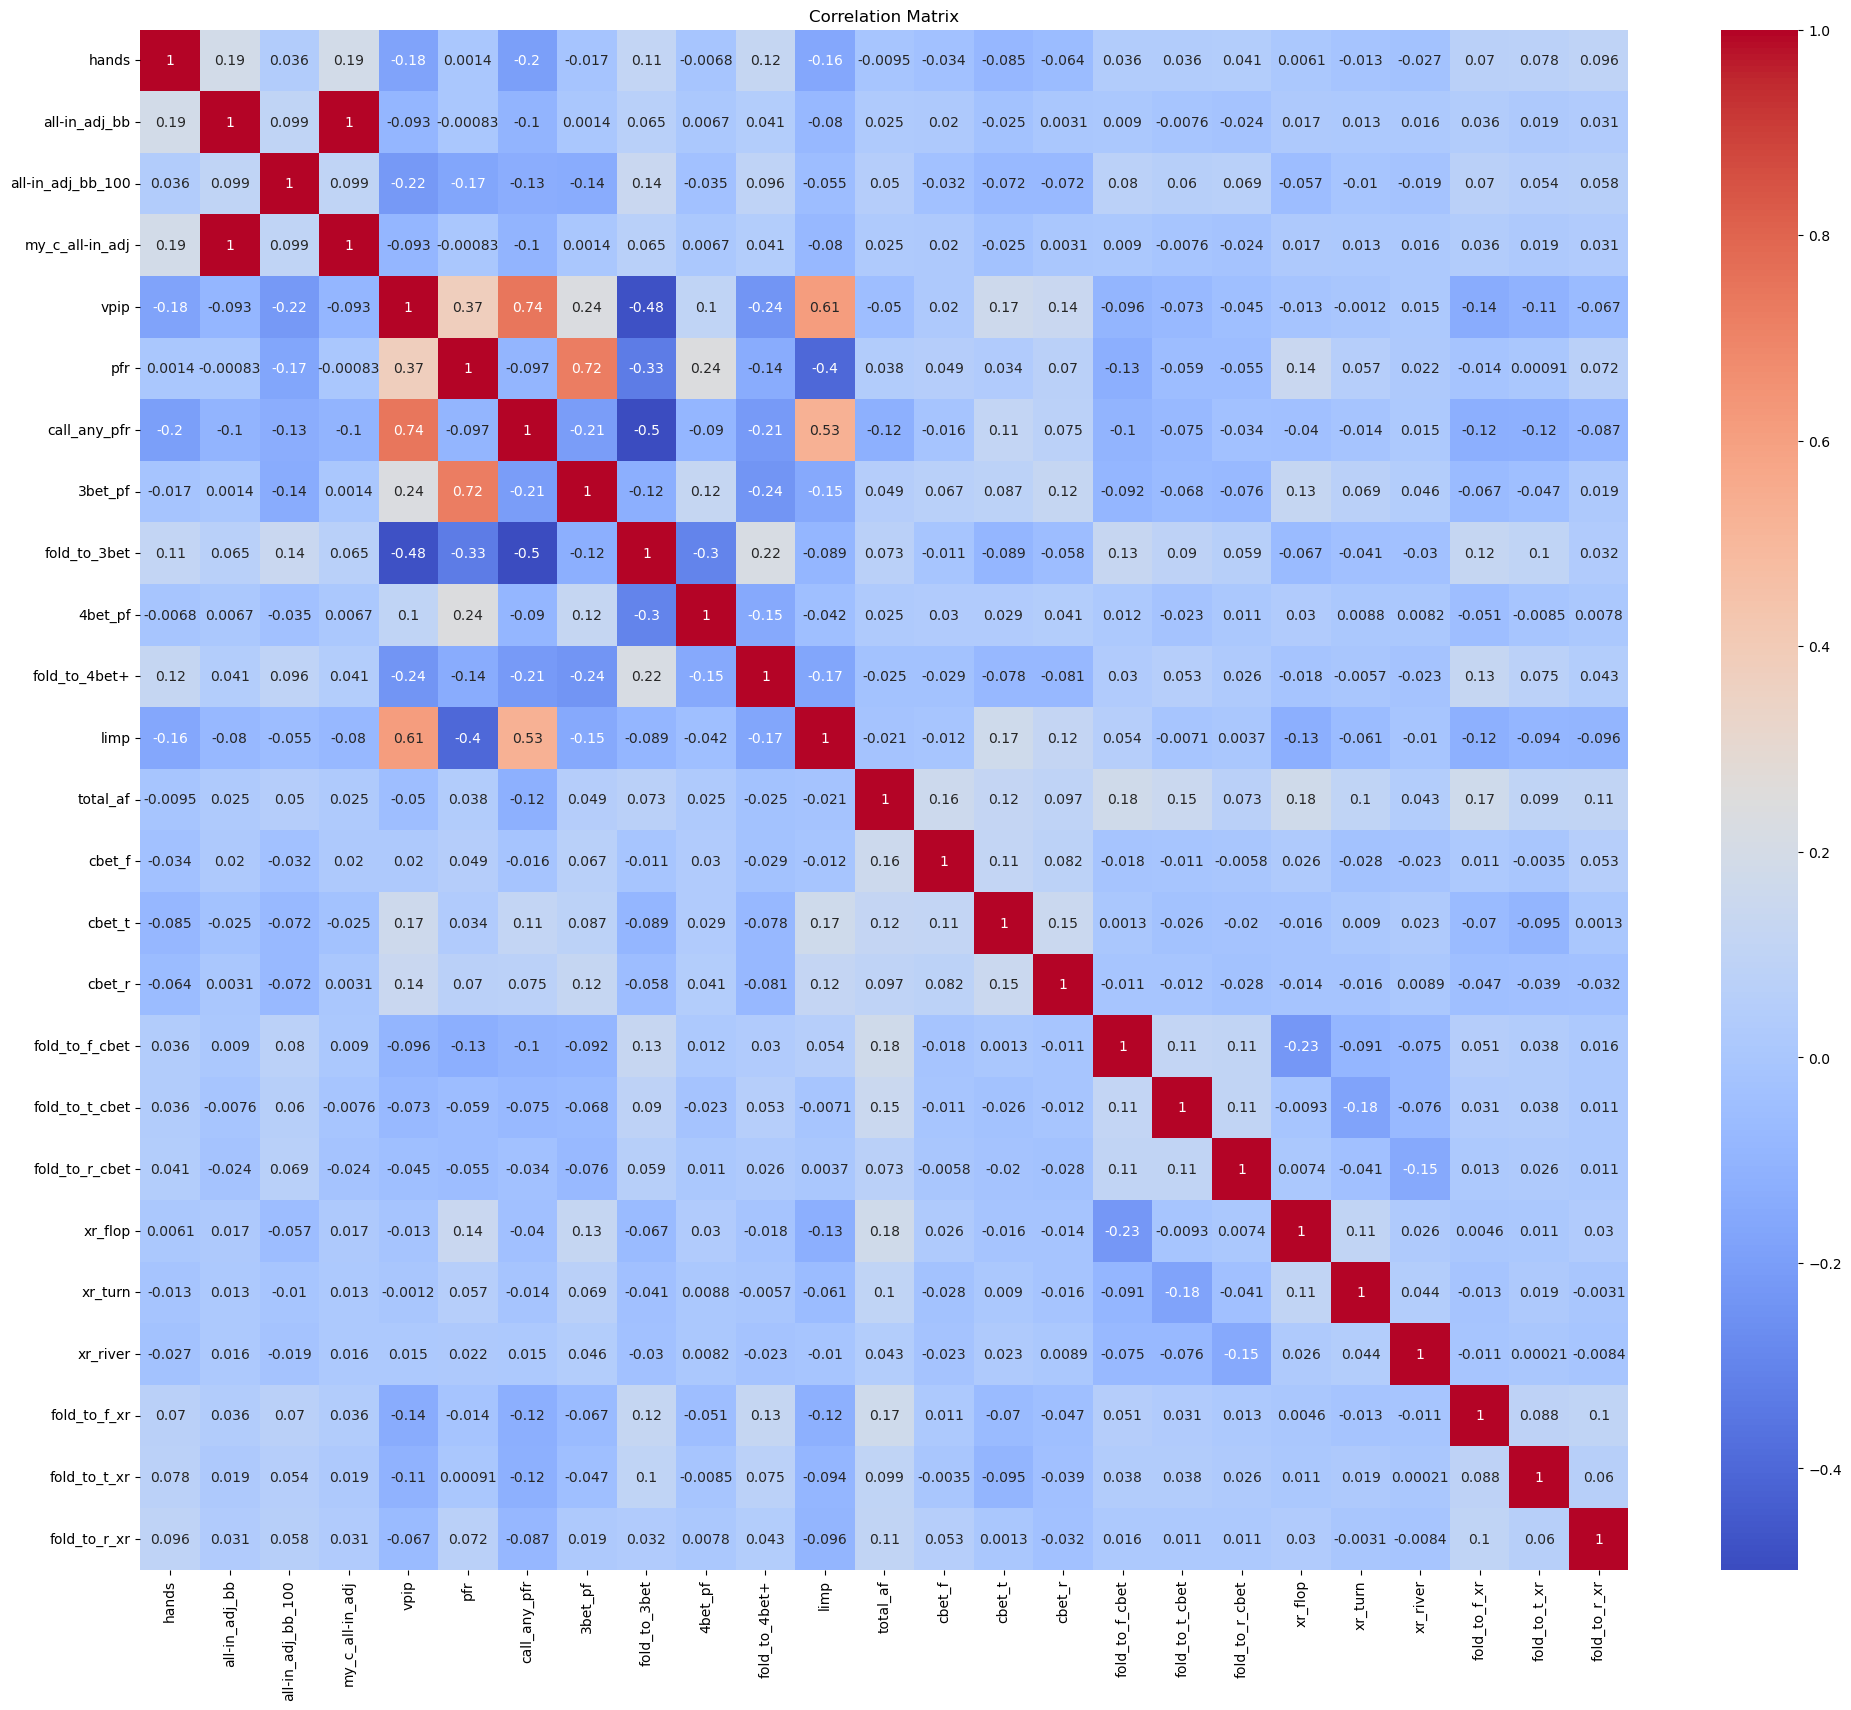

In [15]:


# Calculate the correlation matrix
correlation_matrix = poker_data_df.corr()

# Create a heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()


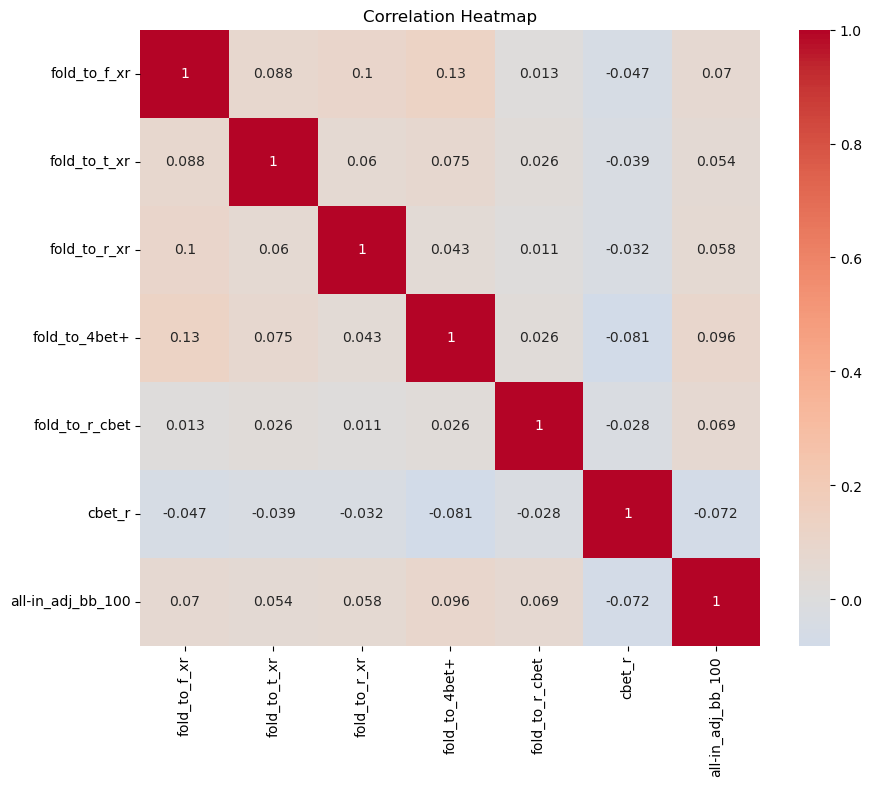

In [16]:


# Select the columns of interest
selected_columns = ['fold_to_f_xr', 'fold_to_t_xr', 'fold_to_r_xr', 'fold_to_4bet+', 'fold_to_r_cbet', 'cbet_r', 'all-in_adj_bb_100']

# Create a subset of the dataframe with selected columns
selected_data = poker_data_df[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


##### The correlation matrix indicates that the listed statistics exhibit weak relationships with our target variable.
But as i want my model to be very accurate, I will do the following: 
Create 2 different data frames:


1 for option 1:  Delete Rows with Less Than 1000 Hands; This database will be use for all my regression models and hypothesis testing. I decided to do this because most of my statistics require at least 500 or 1000 hands to be fullfilled. Example (this plays occur  about 
only 1 in 500 plays: fold_to_r_cbet	xr_flop	xr_turn	xr_river fold_to_f_xr	fold_to_t_xr	fold_to_r_xr)

1 for option 2: Impute Missing Values with Mean or Median; This database will be used only to validate the findings on the first database.



# Dataframe 1: df_players_<1000_hands 

In [17]:
# Create a DataFrame with players having more than 1000 hands
df_players_1000_hands = poker_data_df[poker_data_df['hands'] > 1000]


In [18]:
df_players_1000_hands

,player,hands,all-in_adj_bb,all-in_adj_bb_100,my_c_all-in_adj,vpip,pfr,call_any_pfr,3bet_pf,fold_to_3bet,...,cbet_r,fold_to_f_cbet,fold_to_t_cbet,fold_to_r_cbet,xr_flop,xr_turn,xr_river,fold_to_f_xr,fold_to_t_xr,fold_to_r_xr
0,kozirek,61838,5286.24,8.55,1321.56,22.52,18.55,10.83,8.32,76.27,...,49.56,38.52,39.21,42.86,13.23,9.52,5.19,43.72,49.38,52.63
1,npAaL,53022,2583.04,4.87,645.76,17.10,14.14,8.40,6.40,80.10,...,49.62,52.82,38.78,57.69,9.23,8.69,5.97,33.33,35.71,38.46
2,tukeiron,49593,-859.00,-1.73,-214.75,24.00,19.60,12.26,7.69,76.47,...,41.81,39.88,45.28,38.46,8.43,3.33,2.63,50.74,52.50,75.00
3,Hamjhito,49279,-1529.24,-3.10,-382.31,21.14,16.10,12.86,6.30,78.16,...,51.28,49.09,39.79,47.78,6.29,6.41,4.04,35.23,30.30,54.55
4,JasonMerccie,44865,82.00,0.18,20.50,21.74,18.53,9.29,9.19,78.58,...,54.25,39.66,42.36,39.44,10.88,5.49,2.32,36.84,47.37,61.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,junwen1124,1012,11.96,1.18,2.99,29.45,16.91,29.48,1.62,69.41,...,71.43,37.93,35.29,25.00,7.50,18.52,14.29,100.00,0.00,NaN
1160,papagiorg,1011,-469.92,-46.48,-117.48,51.41,20.61,47.76,10.07,52.34,...,50.00,38.85,56.76,83.33,11.21,1.69,6.90,0.00,0.00,NaN
1161,tournidis,1008,-453.32,-44.97,-113.33,30.68,5.61,24.65,4.26,74.19,...,100.00,35.48,44.44,0.00,29.31,14.29,0.00,25.00,66.67,NaN
1162,HARK 04,1008,112.68,11.18,28.17,29.01,19.61,23.26,3.91,75.27,...,50.00,48.00,66.67,0.00,4.65,10.00,0.00,0.00,NaN,NaN


In [19]:
df_players_1000_hands.isnull().sum()

player                 0
hands                  0
all-in_adj_bb          0
all-in_adj_bb_100      0
my_c_all-in_adj        0
vpip                   0
pfr                    0
call_any_pfr           0
3bet_pf                0
fold_to_3bet           0
4bet_pf                0
fold_to_4bet+          1
limp                   0
total_af               0
cbet_f                 0
cbet_t                 2
cbet_r                20
fold_to_f_cbet         1
fold_to_t_cbet         2
fold_to_r_cbet        45
xr_flop                0
xr_turn                0
xr_river               0
fold_to_f_xr          13
fold_to_t_xr          77
fold_to_r_xr         337
dtype: int64

In [20]:
# I still have to fill some Nans, and i will inpute them with median or mean , based on each variable distribution (mean for normal distribution variables and median for skewed distributions, i will also describe the list of normal and skewed distribution columns, wich i was able to see on the histograms that are above in my jupyter notebook.

# List of columns with normal distributions
columns_normal = ['pfr', 'cbet_f', 'cbet_t', 'cbet_r', 'fold_to_f_cbet', 'fold_to_t_cbet', 'fold_to_r_cbet']

# List of columns with skewed distributions and outliers
columns_skewed = ['vpip', 'call_any_pfr', '3bet_pf', 'fold_to_3bet', '4bet_pf', 'fold_to_4bet+', 
                  'limp', 'total_af', 'xr_flop', 'xr_turn', 'xr_river', 'fold_to_f_xr', 
                  'fold_to_t_xr', 'fold_to_r_xr']

# Apply mean imputation to columns with normal distributions
df_players_1000_hands[columns_normal] = df_players_1000_hands[columns_normal].fillna(df_players_1000_hands[columns_normal].mean())

# Apply median imputation to columns with skewed distributions
df_players_1000_hands[columns_skewed] = df_players_1000_hands[columns_skewed].fillna(df_players_1000_hands[columns_skewed].median())





C:\Users\jmcso\AppData\Local\Temp\ipykernel_18576\3619491861.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_1000_hands[columns_normal] = df_players_1000_hands[columns_normal].fillna(df_players_1000_hands[columns_normal].mean())
C:\Users\jmcso\AppData\Local\Temp\ipykernel_18576\3619491861.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_1000_hands[columns_skewed] = df_players_1000_hands[columns_skewed].fillna(df_players_1000_hands[columns_skewed].median())


In [21]:
df_players_1000_hands.isnull().sum()

player               0
hands                0
all-in_adj_bb        0
all-in_adj_bb_100    0
my_c_all-in_adj      0
vpip                 0
pfr                  0
call_any_pfr         0
3bet_pf              0
fold_to_3bet         0
4bet_pf              0
fold_to_4bet+        0
limp                 0
total_af             0
cbet_f               0
cbet_t               0
cbet_r               0
fold_to_f_cbet       0
fold_to_t_cbet       0
fold_to_r_cbet       0
xr_flop              0
xr_turn              0
xr_river             0
fold_to_f_xr         0
fold_to_t_xr         0
fold_to_r_xr         0
dtype: int64

In [22]:
df_players_1000_hands.to_csv('poker_data_df_filled.csv', index=False)


# Dataframe 2 df_imputed

# For more than half of the columns, this df has 50%+ of Nan values, this happens because in poker, there are some type of plays that happen only 1 in 100 times or 1 in 1000 times(example: fold to river check raise or fold to 4bet+) and since the database has a most of the rows containing only players with 1-100 hands, we aren't able to gather information for statistics of plays that never happened
### Anyway, the df is still usefull because it has a lot of information of unexperienced players, so i will inpute mean (for normal distribution columns) and  median (for skewed columns with outliers) accordingly.

In [23]:
df_imputed = poker_data_df

In [24]:
df_imputed.isnull().sum()

player                   0
hands                    0
all-in_adj_bb            0
all-in_adj_bb_100        0
my_c_all-in_adj          0
vpip                     6
pfr                      7
call_any_pfr           242
3bet_pf                617
fold_to_3bet          2160
4bet_pf               2428
fold_to_4bet+         7043
limp                   844
total_af              1921
cbet_f                3831
cbet_t                6541
cbet_r                9191
fold_to_f_cbet        2231
fold_to_t_cbet        5303
fold_to_r_cbet        8997
xr_flop               2755
xr_turn               4308
xr_river              6208
fold_to_f_xr          9107
fold_to_t_xr         10111
fold_to_r_xr         11868
dtype: int64

In [25]:
# List of columns with normal distributions
columns_normal = ['pfr', 'cbet_f', 'cbet_t', 'cbet_r', 'fold_to_f_cbet', 'fold_to_t_cbet', 'fold_to_r_cbet']

# List of columns with skewed distributions and outliers
columns_skewed = ['vpip', 'call_any_pfr', '3bet_pf', 'fold_to_3bet', '4bet_pf', 'fold_to_4bet+', 
                  'limp', 'total_af', 'xr_flop', 'xr_turn', 'xr_river', 'fold_to_f_xr', 
                  'fold_to_t_xr', 'fold_to_r_xr']

# Apply mean imputation to columns with normal distributions
df_imputed[columns_normal] = df_imputed[columns_normal].fillna(df_imputed[columns_normal].mean())

# Apply median imputation to columns with skewed distributions
df_imputed[columns_skewed] = df_imputed[columns_skewed].fillna(df_imputed[columns_skewed].median())


In [26]:
df_imputed.isnull().sum()

player               0
hands                0
all-in_adj_bb        0
all-in_adj_bb_100    0
my_c_all-in_adj      0
vpip                 0
pfr                  0
call_any_pfr         0
3bet_pf              0
fold_to_3bet         0
4bet_pf              0
fold_to_4bet+        0
limp                 0
total_af             0
cbet_f               0
cbet_t               0
cbet_r               0
fold_to_f_cbet       0
fold_to_t_cbet       0
fold_to_r_cbet       0
xr_flop              0
xr_turn              0
xr_river             0
fold_to_f_xr         0
fold_to_t_xr         0
fold_to_r_xr         0
dtype: int64

In [27]:
df_imputed.to_csv('poker_data_df_imputed.csv', index=False)


In [28]:
# Now i will drop columns player and hands that don't have impact on our model, and 'all-in_adj_bb' + 'my_c_all-in_adj'
# wich are redundant.
# all-in_adj_bb_100 has already this information and is our target variable so I won't need this other 2.
# i will do this for the 2 dfs
for df in [df_imputed, df_players_1000_hands]:
    df.drop(['player', 'all-in_adj_bb', 'my_c_all-in_adj', 'hands'], axis=1, inplace=True)


C:\Users\jmcso\AppData\Local\Temp\ipykernel_18576\3225120374.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['player', 'all-in_adj_bb', 'my_c_all-in_adj', 'hands'], axis=1, inplace=True)


In [29]:
#Saving them all again
df_imputed.to_csv('poker_data_df_imputed.csv', index=False)
df_players_1000_hands.to_csv('poker_data_df_players_1000_hands.csv', index=False)



# Exploratory Data Analysis.

### I will do this part for the 3 dataframes created earlier

In [30]:
desc_stats_players_1000 = df_players_1000_hands.describe()
desc_stats_players_1000

,all-in_adj_bb_100,vpip,pfr,call_any_pfr,3bet_pf,fold_to_3bet,4bet_pf,fold_to_4bet+,limp,total_af,...,cbet_r,fold_to_f_cbet,fold_to_t_cbet,fold_to_r_cbet,xr_flop,xr_turn,xr_river,fold_to_f_xr,fold_to_t_xr,fold_to_r_xr
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,...,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,-8.009588,28.089192,18.198995,19.542268,7.819493,72.536366,6.530172,58.306108,4.877947,2.229330,...,51.941049,42.848985,42.622978,47.364004,8.874579,7.603282,4.536460,39.221357,41.920009,49.157122
std,24.873786,9.426078,5.193203,12.325651,3.236467,9.702327,3.225029,15.586697,11.380973,0.850846,...,20.551511,9.082768,13.399809,23.751141,5.651550,5.223196,5.247829,21.910843,27.276044,31.704801
min,-273.340000,12.570000,0.570000,0.180000,0.000000,19.230000,0.000000,0.000000,0.000000,0.470000,...,0.000000,10.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-15.760000,22.630000,16.227500,10.917500,5.877500,67.980000,4.350000,50.000000,0.260000,1.737500,...,40.000000,36.990000,34.850000,33.330000,5.000000,4.110000,0.000000,25.000000,25.000000,33.330000
50%,-3.260000,25.080000,18.885000,14.890000,8.095000,74.910000,6.470000,59.300000,0.740000,2.110000,...,50.000000,42.829493,42.020000,50.000000,8.065000,6.900000,3.330000,40.000000,42.110000,50.000000
75%,5.157500,30.105000,20.852500,25.012500,9.840000,78.820000,8.555000,66.670000,2.335000,2.570000,...,62.500000,48.440000,50.000000,60.000000,11.760000,10.275000,6.910000,50.000000,55.560000,66.670000
max,73.120000,86.610000,43.060000,78.010000,27.830000,95.120000,23.400000,100.000000,89.910000,10.560000,...,100.000000,75.610000,100.000000,100.000000,41.940000,37.500000,40.000000,100.000000,100.000000,100.000000


In [31]:
desc_stats_imputed = df_imputed.describe()
desc_stats_imputed

,all-in_adj_bb_100,vpip,pfr,call_any_pfr,3bet_pf,fold_to_3bet,4bet_pf,fold_to_4bet+,limp,total_af,...,cbet_r,fold_to_f_cbet,fold_to_t_cbet,fold_to_r_cbet,xr_flop,xr_turn,xr_river,fold_to_f_xr,fold_to_t_xr,fold_to_r_xr
count,13858.000000,13858.000000,13858.000000,13858.000000,13858.000000,13858.000000,13858.000000,13858.000000,13858.000000,13858.000000,...,13858.000000,13858.000000,13858.000000,13858.000000,13858.000000,13858.000000,13858.000000,13858.000000,13858.000000,13858.000000
mean,-229.336266,46.334025,18.246404,39.860123,9.138677,59.457782,6.200234,46.815831,23.175228,2.311111,...,58.421993,39.477559,37.732188,43.323049,6.823562,5.851033,3.510978,27.707945,27.697860,34.727015
std,1345.071165,23.214639,17.536859,24.193129,15.316431,28.472012,16.068800,27.190945,25.907671,2.149314,...,22.162141,24.608157,26.246428,23.235991,16.094288,16.407721,14.085988,22.060852,20.906802,16.822344
min,-24752.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-195.307500,29.852500,6.670000,22.500000,0.000000,50.000000,0.000000,50.000000,0.380000,1.320000,...,58.421993,26.920000,28.570000,43.323049,0.000000,0.000000,0.000000,25.000000,25.000000,33.330000
50%,-54.560000,43.480000,16.280000,38.460000,5.260000,64.290000,0.000000,50.000000,14.290000,1.950000,...,58.421993,39.477559,37.732188,43.323049,0.000000,0.000000,0.000000,25.000000,25.000000,33.330000
75%,2.250000,60.000000,23.530000,53.570000,10.510000,76.710000,5.910000,50.000000,39.305000,2.620000,...,58.421993,50.000000,45.000000,43.323049,7.410000,0.000000,0.000000,25.000000,25.000000,33.330000
max,17280.000000,100.000000,100.000000,100.000000,100.000000,100.000000,200.000000,100.000000,100.000000,77.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


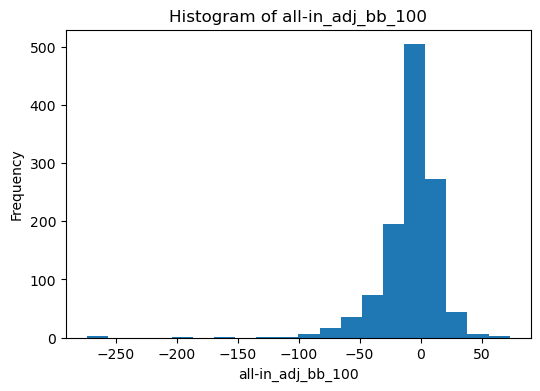

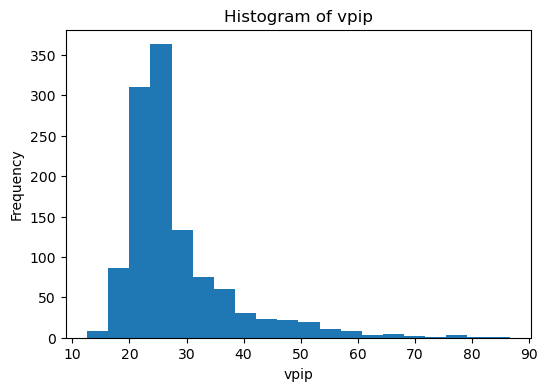

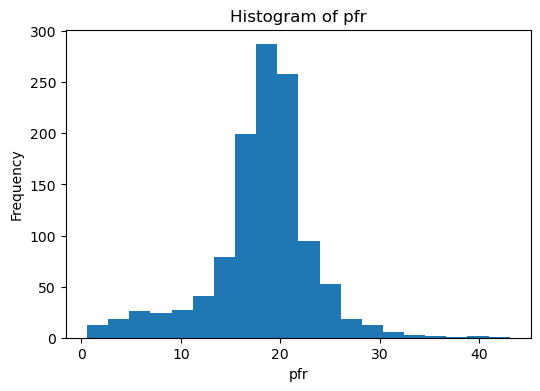

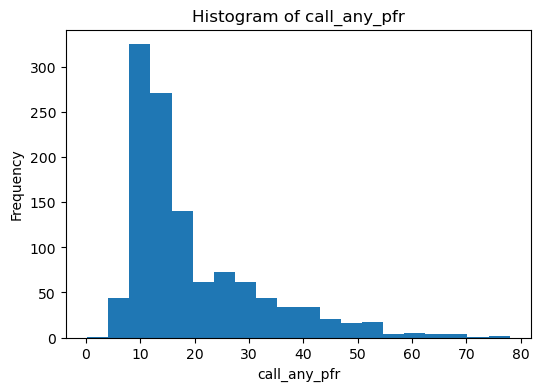

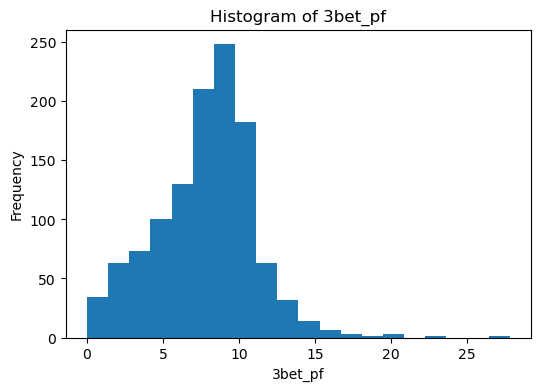

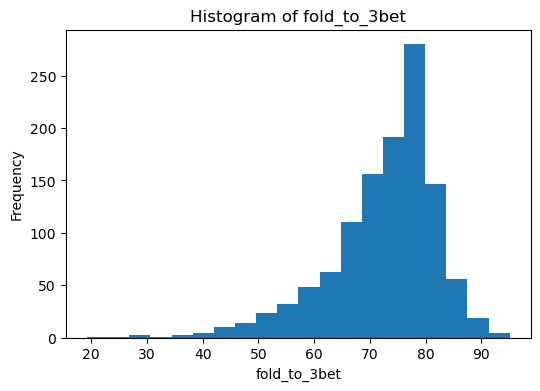

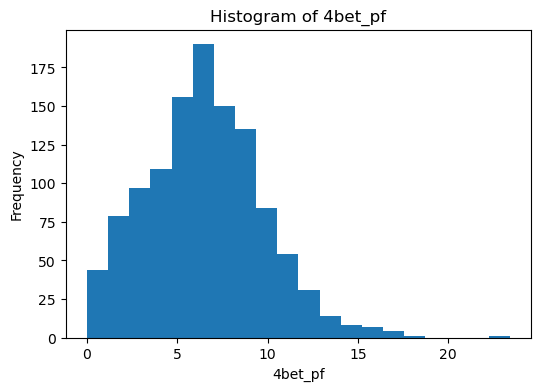

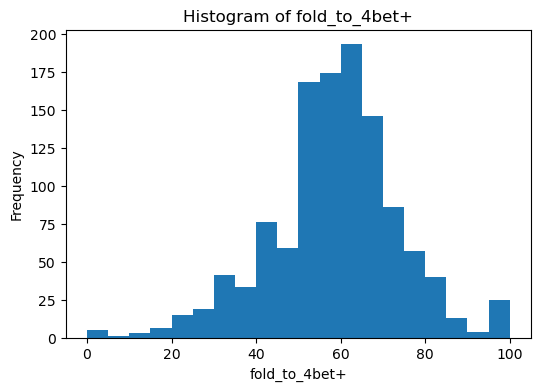

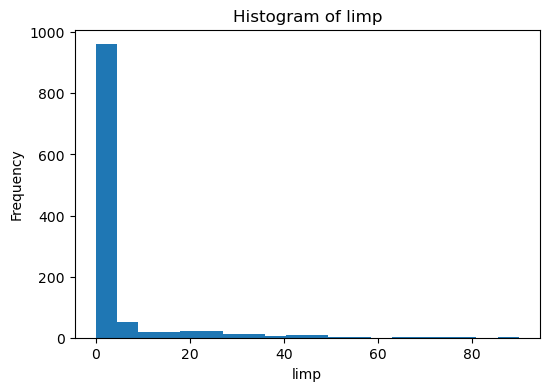

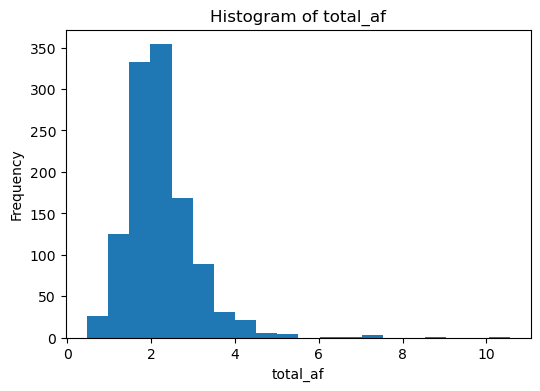

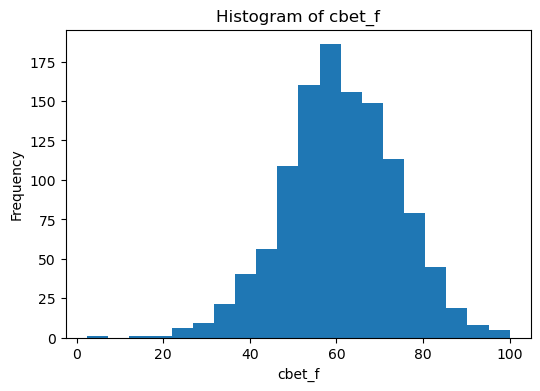

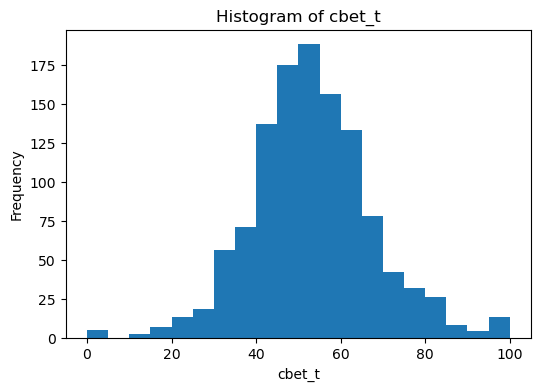

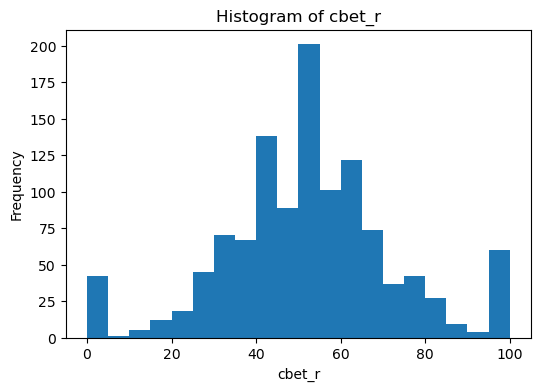

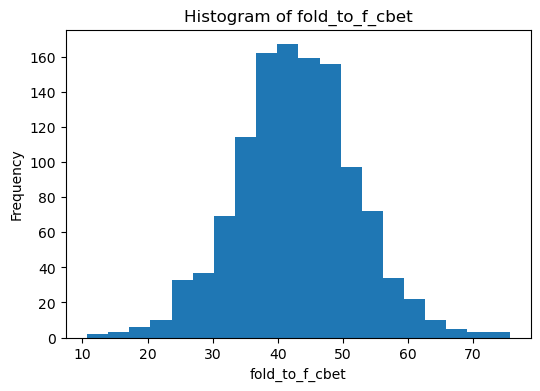

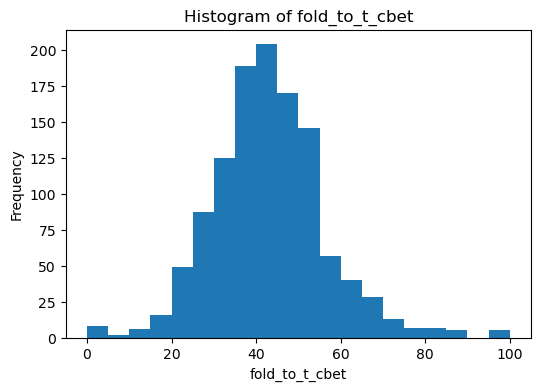

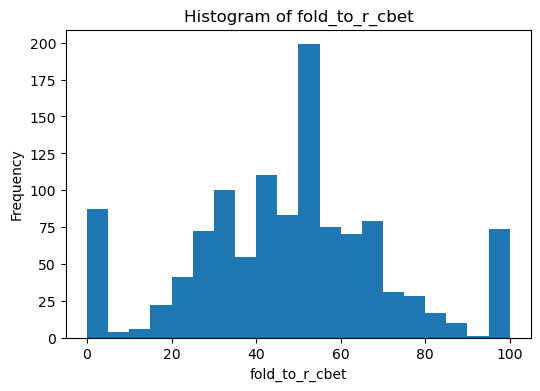

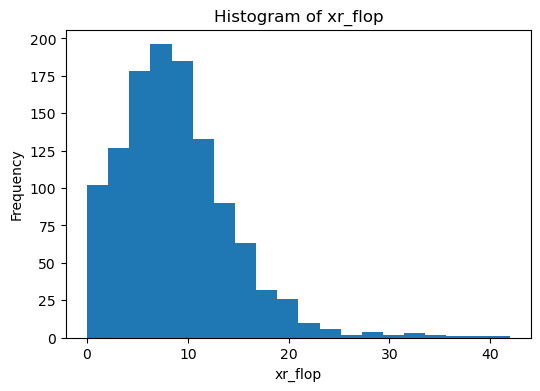

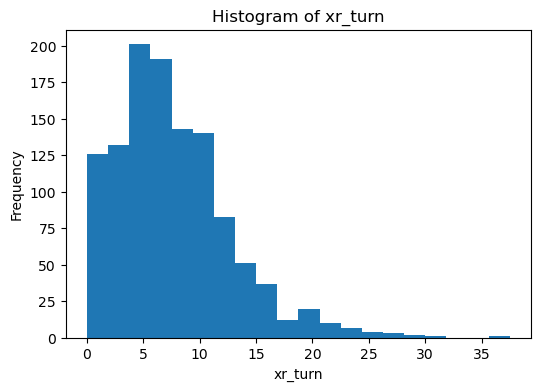

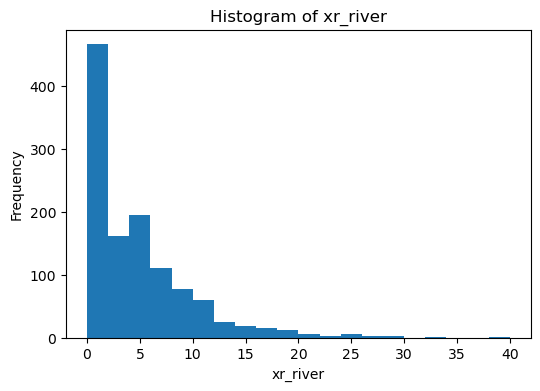

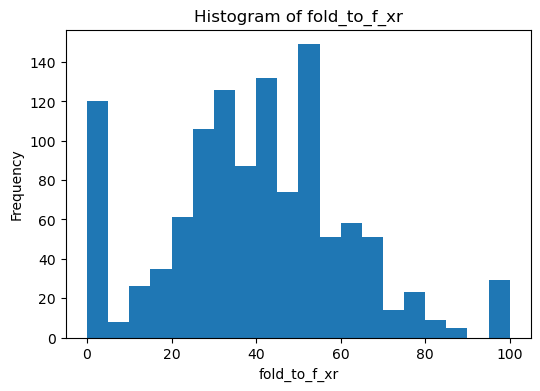

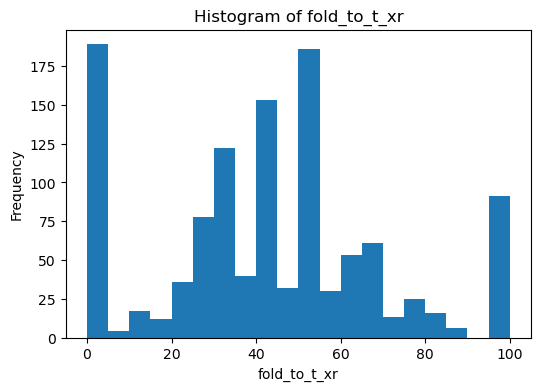

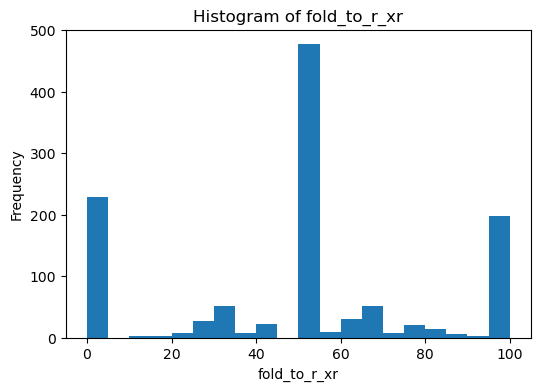

In [32]:
import matplotlib.pyplot as plt

# Iterate through each column and create histograms
for column in df_players_1000_hands.columns:
    plt.figure(figsize=(6, 4)) 
    plt.hist(df_players_1000_hands[column], bins=20)  
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


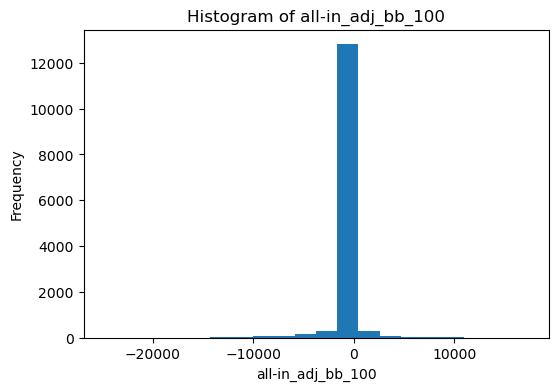

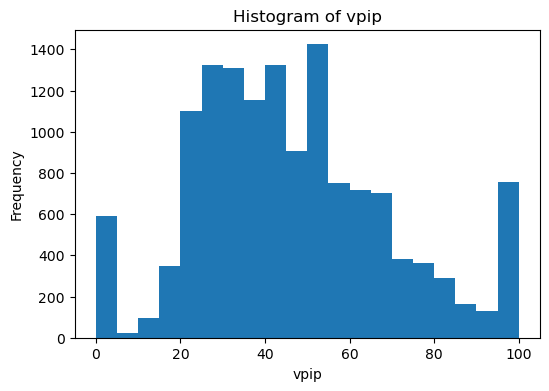

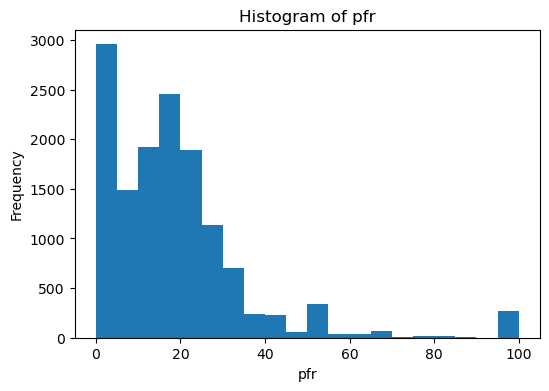

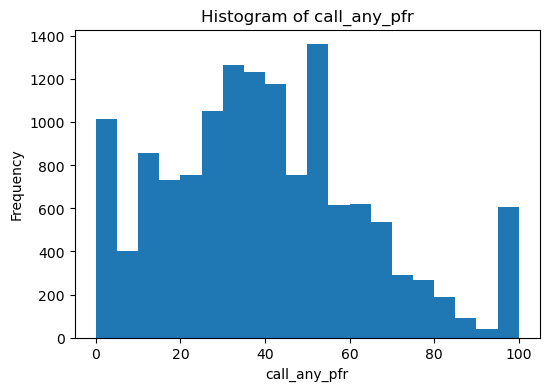

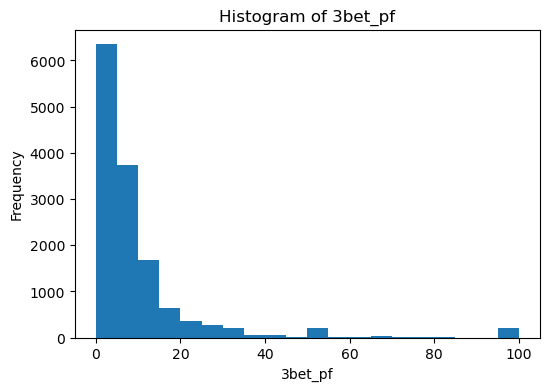

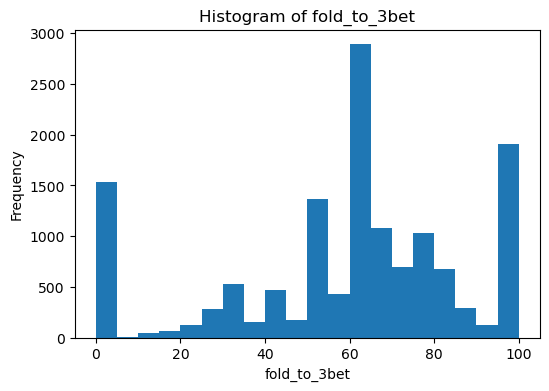

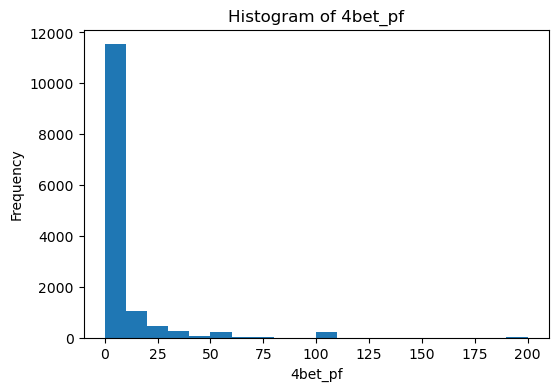

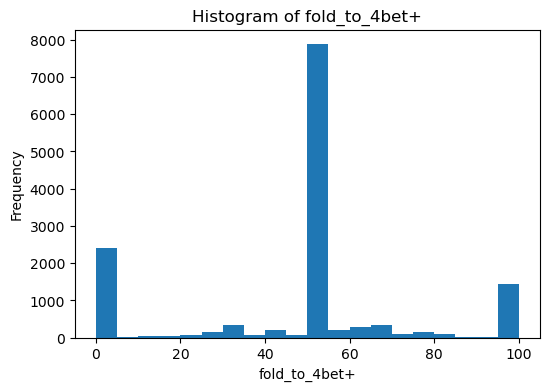

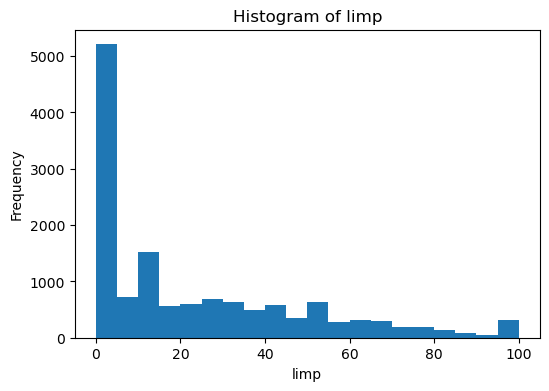

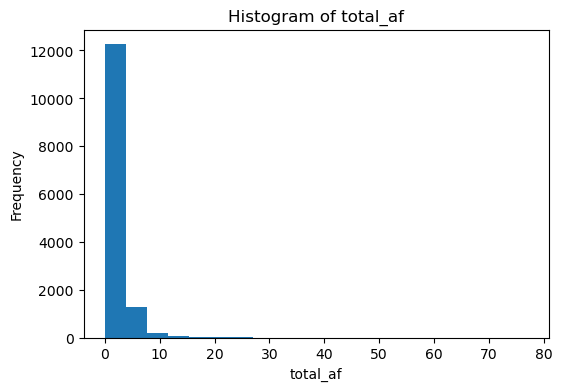

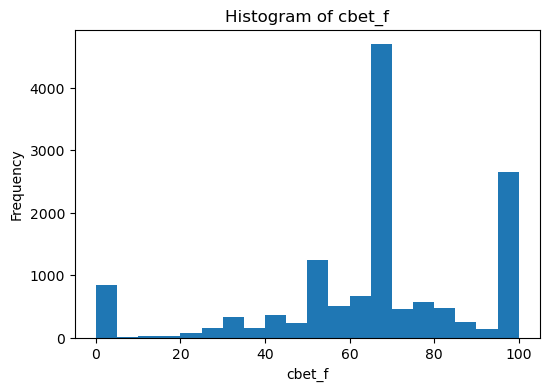

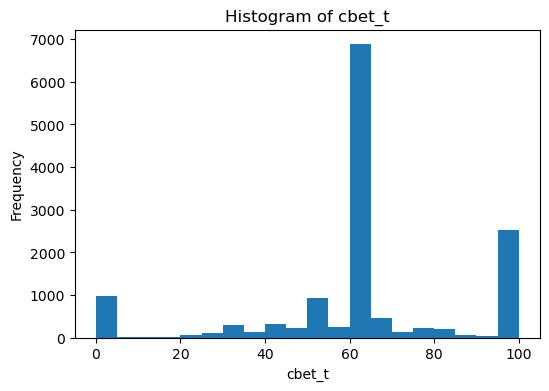

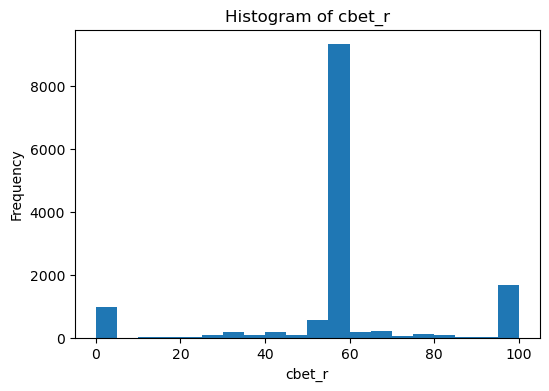

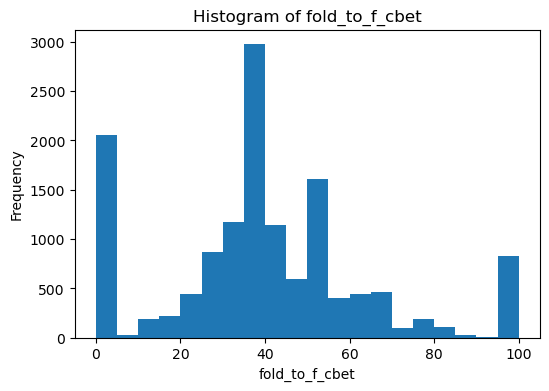

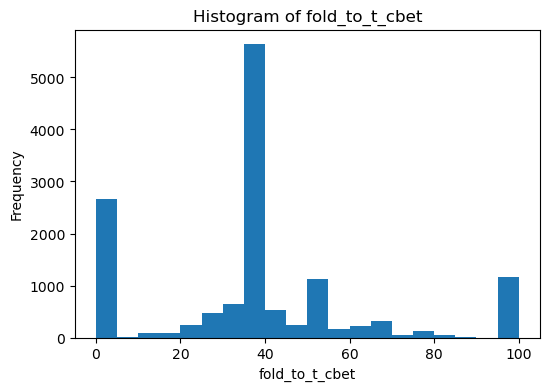

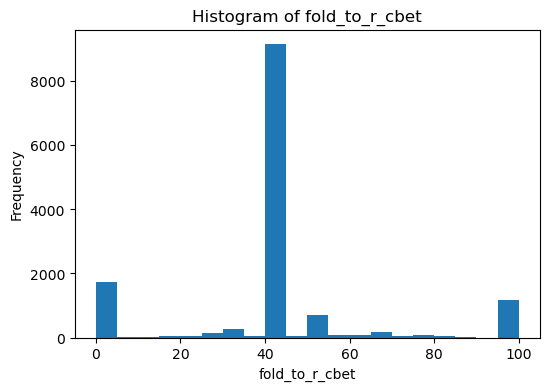

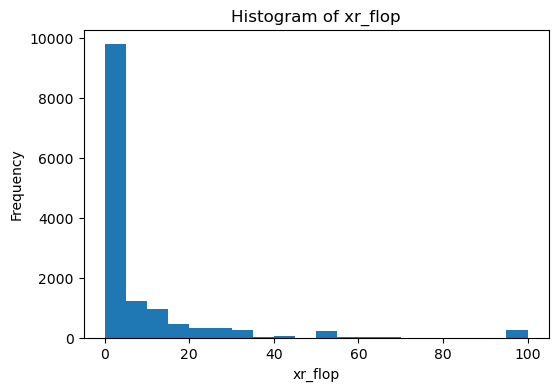

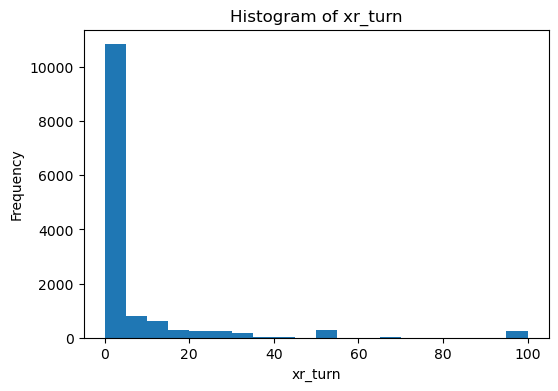

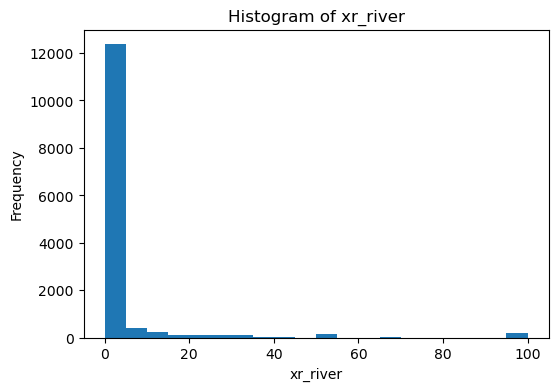

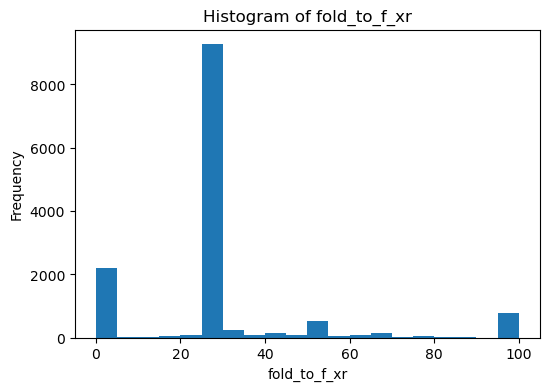

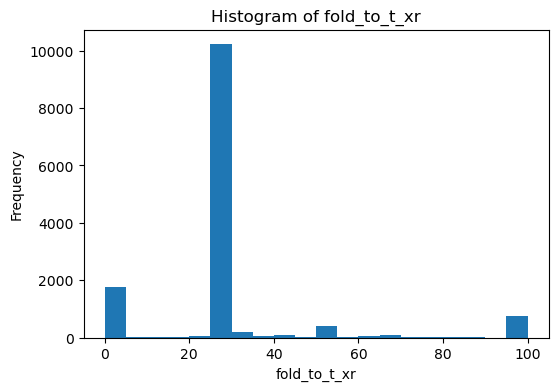

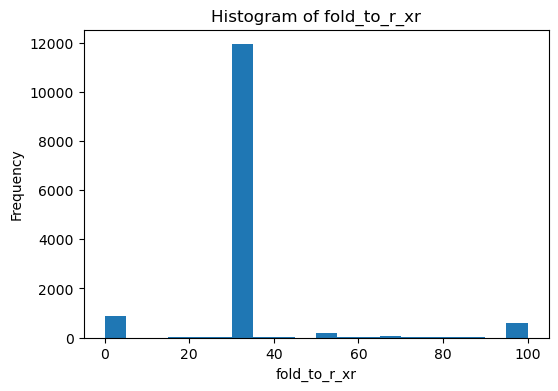

In [33]:
import matplotlib.pyplot as plt

# Iterate through each column and create histograms
for column in df_imputed.columns:
    plt.figure(figsize=(6, 4))  
    plt.hist(df_imputed[column], bins=20)  
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


### Based on histograms, we can check that most of the columns have skewed distributions with outlier, while 7 columns have normal distributions, here is the full list of each variable distribution:
### Columns with Normal Distributions:

PFR (Pre-flop Raise Percentage)

Cbet_F (Continuation Bet on the Flop)

Cbet_T (Continuation Bet on the Turn)

Cbet_R (Continuation Bet on the River)

Fold_to_F_Cbet (Fold to Flop Continuation Bet)

Fold_to_T_Cbet (Fold to Turn Continuation Bet)

Fold_to_R_Cbet (Fold to River Continuation Bet)


### Columns with Skewed Distributions and Outliers:

VPIP (Voluntarily Put Money in Pot Percentage)

Call_Any_PFR (Call Any Pre-flop Raise Percentage)

3bet_PF (Three-Bet Pre-flop Percentage)

Fold_to_3bet (Fold to Three-Bet Percentage)

4bet_PF (Four-Bet Pre-flop Percentage)

Fold_to_4bet+ (Fold to Four-Bet and Higher Percentage)

Limp (Limp Percentage)

Total_AF (Total Aggression Factor)

XR_Flop (X-Raise on the Flop Percentage)

XR_Turn (X-Raise on the Turn Percentage)

XR_River (X-Raise on the River Percentage)

Fold_to_F_XR (Fold to Flop X-Raise Percentage)

Fold_to_T_XR (Fold to Turn X-Raise Percentage)

Fold_to_R_XR (Fold to River X-Raise Percentage)

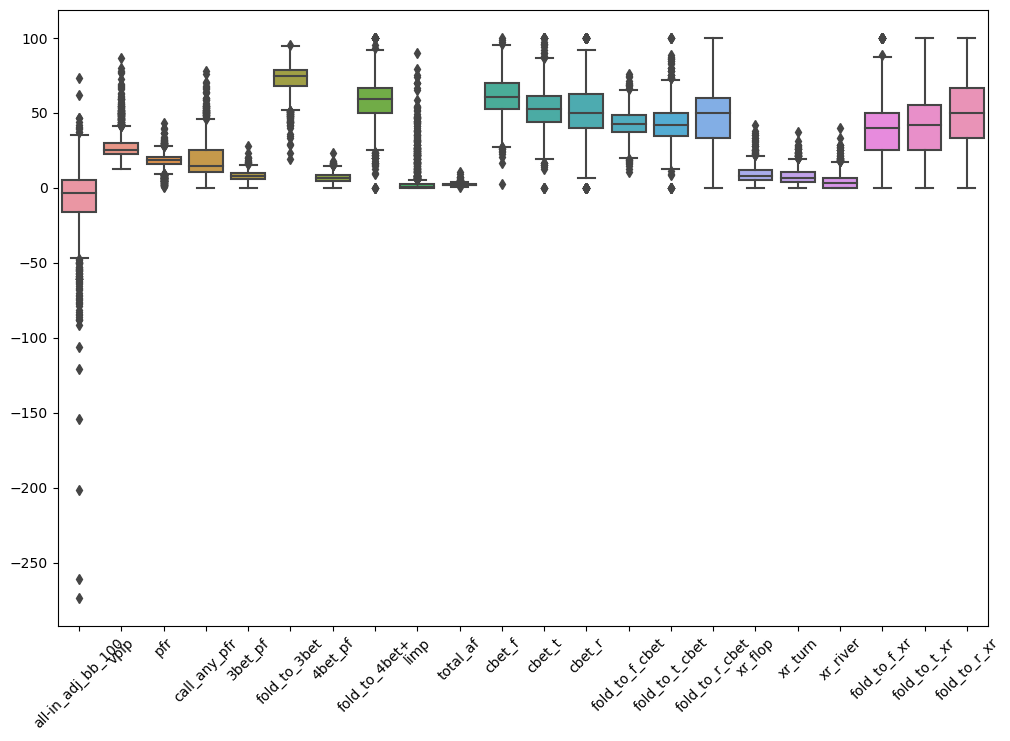

In [34]:


plt.figure(figsize=(12, 8))
sns.boxplot(data=df_players_1000_hands)
plt.xticks(rotation=45)
plt.show()



# From the box plots of both dfs we can see some clear outliers, let's work on them.
# Here is a list of all outliers i found in different columns for df_players_1000_hands

'all_in_adj_bb_100': Rows with values below -100 and above 50 will be deleted.


'fold_to_4bet+': Rows with values below 10 will be deleted.


'limp': Rows with values above 80 will be deleted.


'cbet_flop': Rows with values below 10 will be deleted.


'cbet_turn': Rows with values below 5 will be deleted.


'cbet_river': Rows with values below 4 and above 92 will be deleted.


'fold_to_flop_xr': Rows with values above 95 will be deleted.




In [35]:
# Removing outliers for 'all_in_adj_bb_100' column
df_players_1000_hands = df_players_1000_hands[(df_players_1000_hands['all-in_adj_bb_100'] >= -100) & (df_players_1000_hands['all-in_adj_bb_100'] <= 50)]

# Removing outliers for 'fold_to_4bet+' column
df_players_1000_hands = df_players_1000_hands[df_players_1000_hands['fold_to_4bet+'] >= 10]

# Removing outliers for 'limp' column
df_players_1000_hands = df_players_1000_hands[df_players_1000_hands['limp'] <= 80]

# Removing outliers for 'cbet_flop' column
df_players_1000_hands = df_players_1000_hands[df_players_1000_hands['cbet_f'] >= 10]

# Removing outliers for 'cbet_turn' column
df_players_1000_hands = df_players_1000_hands[df_players_1000_hands['cbet_t'] >= 5]

# Removing outliers for 'cbet_river' column
df_players_1000_hands = df_players_1000_hands[(df_players_1000_hands['cbet_r'] >= 4) & (df_players_1000_hands['cbet_r'] <= 92)]

# Removing outliers for 'fold_to_flop_xr' column
df_players_1000_hands = df_players_1000_hands[df_players_1000_hands['fold_to_f_xr'] <= 95]


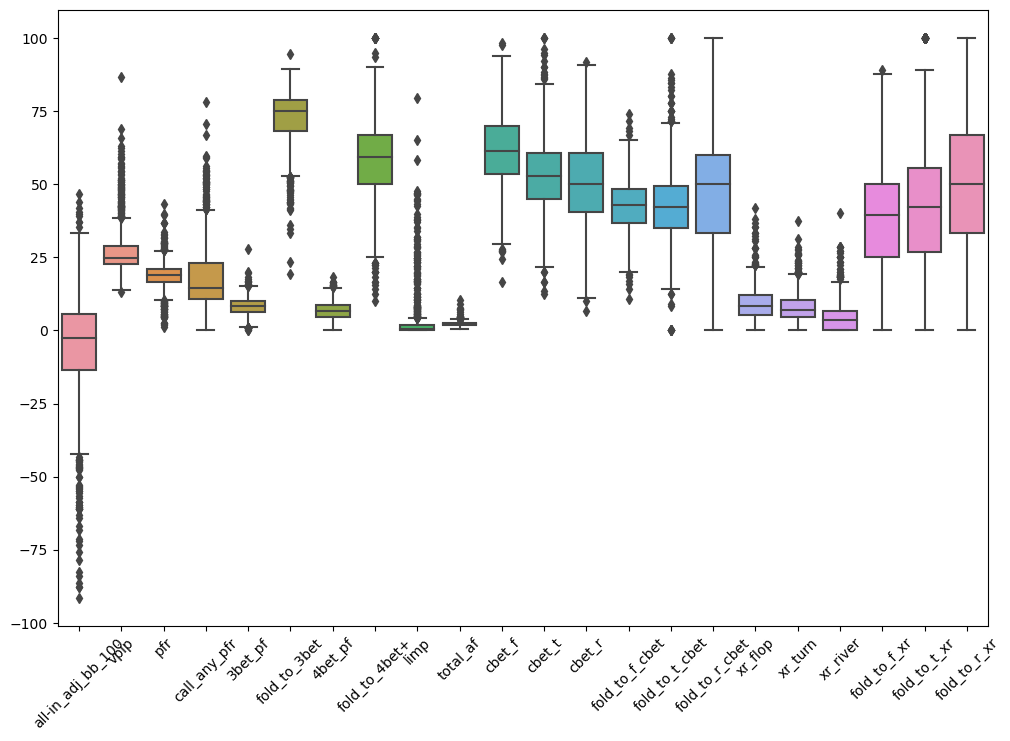

In [36]:


plt.figure(figsize=(12, 8))
sns.boxplot(data=df_players_1000_hands)
plt.xticks(rotation=45)
plt.show()



We can still see some outlier on this df, this happens because as the range of all-in_adj_bb_100 varied from 75  to -250 , i wasn't able to see clearly outlier on other rows tha only vary from 0 to 100. Here are the outliers that still need to be treated:
'vpip': Outliers with values above 75.
'call_any_pfr': Outliers with values above 67.
'3bet_pf': Outliers with values above 25.
'fold_to_3bet': Outliers with values below 25 and above 90.
'fold_to_4bet+': Outliers with values above 96.
'limp': Outliers with values above 50.
'cbet_flop': Outliers with values below 20 and above 96.
'fold_to_turn_cbet': Outliers with values below 5 and above 92.
'xr_river': Outliers with values above 35.
'fold_to_turn_xr': Outliers with values above 90.

In [37]:
# Removing outliers for 'vpip' column
df_players_1000_hands = df_players_1000_hands[df_players_1000_hands['vpip'] <= 75]

# Removing outliers for 'call_any_pfr' column
df_players_1000_hands = df_players_1000_hands[df_players_1000_hands['call_any_pfr'] <= 67]

# Removing outliers for '3bet_pf' column
df_players_1000_hands = df_players_1000_hands[df_players_1000_hands['3bet_pf'] <= 25]

# Removing outliers for 'fold_to_3bet' column
df_players_1000_hands = df_players_1000_hands[(df_players_1000_hands['fold_to_3bet'] >= 25) & (df_players_1000_hands['fold_to_3bet'] <= 90)]

# Removing outliers for 'fold_to_4bet+' column
df_players_1000_hands = df_players_1000_hands[df_players_1000_hands['fold_to_4bet+'] <= 96]

# Removing outliers for 'limp' column
df_players_1000_hands = df_players_1000_hands[df_players_1000_hands['limp'] <= 50]

# Removing outliers for 'cbet_flop' column
df_players_1000_hands = df_players_1000_hands[df_players_1000_hands['cbet_f'] >= 20]

# Removing outliers for 'fold_to_turn_cbet' column
df_players_1000_hands = df_players_1000_hands[(df_players_1000_hands['fold_to_t_cbet'] >= 5) & (df_players_1000_hands['fold_to_t_cbet'] <= 92)]

# Removing outliers for 'xr_river' column
df_players_1000_hands = df_players_1000_hands[df_players_1000_hands['xr_river'] <= 35]

# Removing outliers for 'fold_to_turn_xr' column
df_players_1000_hands = df_players_1000_hands[df_players_1000_hands['fold_to_t_xr'] <= 90]


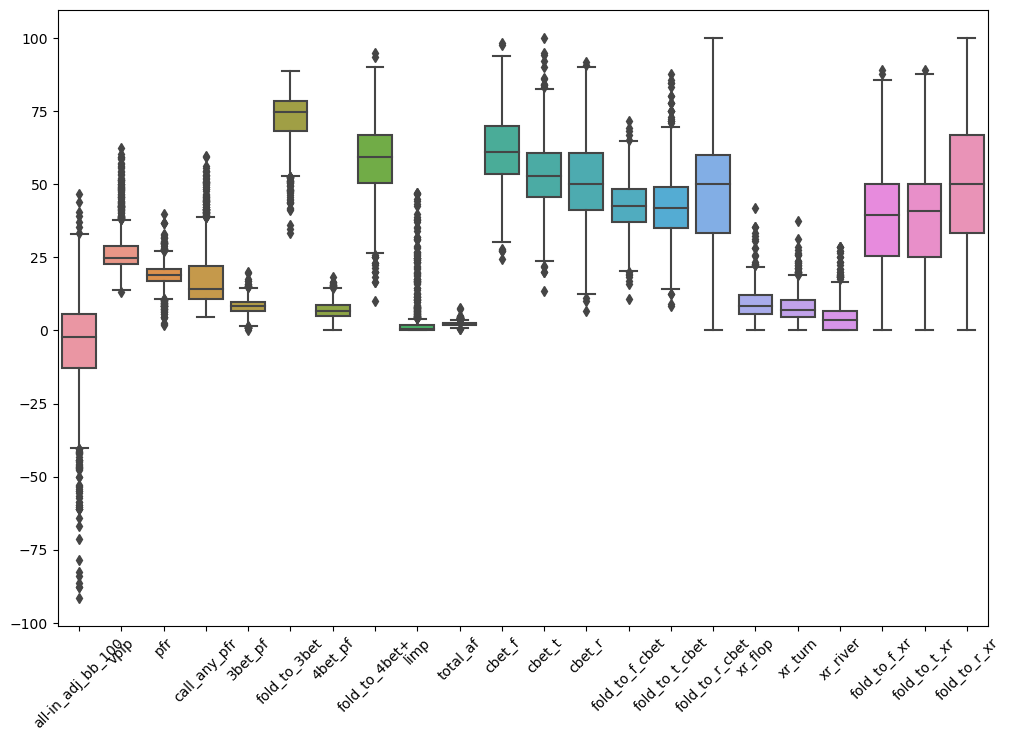

In [38]:


plt.figure(figsize=(12, 8))
sns.boxplot(data=df_players_1000_hands)
plt.xticks(rotation=45)
plt.show()



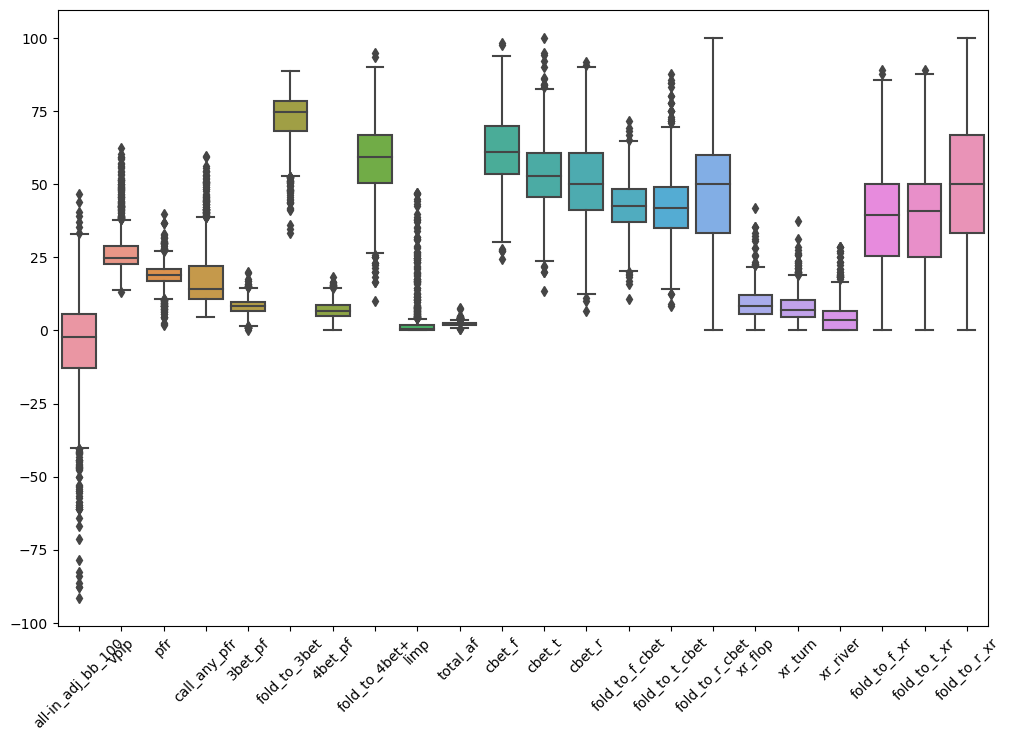

In [39]:


plt.figure(figsize=(12, 8))
sns.boxplot(data=df_players_1000_hands)
plt.xticks(rotation=45)
plt.show()



### Now we can clearly see that all of the columns have almost no outliers, i will leave it as it is, in order to mantain a good data sample 

### Now lets treat  df_imputed dataframe 

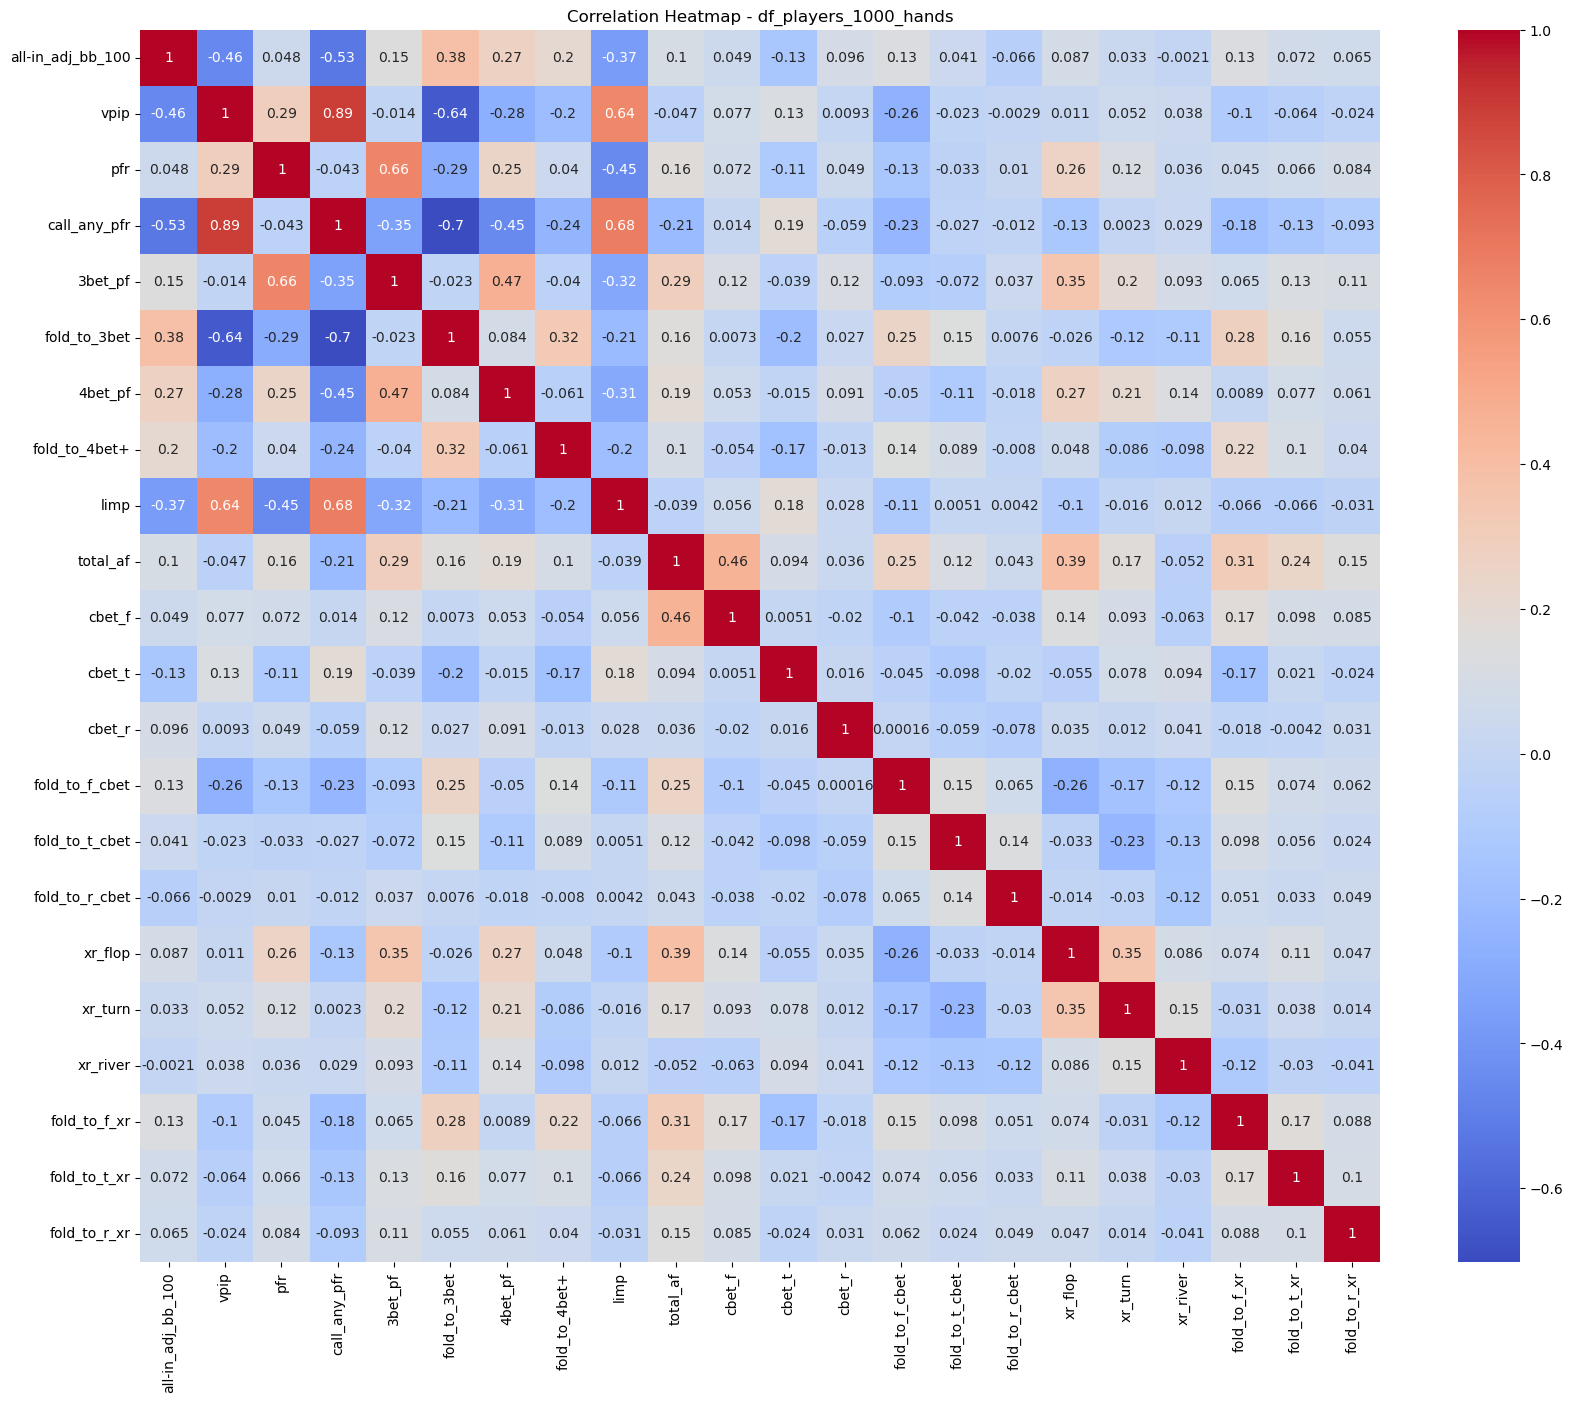

In [40]:
# Correlation Heatmap


plt.figure(figsize=(20, 16))
sns.heatmap(df_players_1000_hands.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - df_players_1000_hands")
plt.show()



### Looking at the correlation heatmap, certain variables stand out due to their strong correlations with our target variable, 'all-in_adj_bb_100', which essentially represents the winnings of poker players. Notably, statistics such as VPIP (Voluntarily Put money In Pot), call_any_pfr (Call Any Pre-Flop Raise), fold_to_3bet, limp, and fold_to_4bet+ exhibit significant correlations with the target variable.

### Particularly intriguing are the variables VPIP, call_any_pfr, and limp, which display correlations close to 50% with the target. This indicates that these statistics are potentially influential indicators of a player's success in poker, and they may play a crucial role in predicting the outcome of a poker game. These high correlations suggest that players' tendencies to voluntarily put money in the pot, call pre-flop raises, and limp (entering the pot with a flat call) might strongly affect their overall winnings. Further exploration of these relationships could provide valuable insights into effective poker strategies.

# Hypothesis testing

### I've completed linear and logistic regressions, and now I'm moving on to hypothesis testing. My strong belief is that certain poker playing statistics—VPIP, Call_Any_PFR, Fold_to_3bet, and Limp—have a substantial impact on poker winnings (all_in_adj_bb_100).

### For this analysis, I'm using the database df_players_1000_hands , wich is the one  that contains more accurate player information and their playing statistics (1000+ hands). I'll treat this database as my sample, while my population consists of players who engage in NL25 games on the PokerStars poker room.


### To investigate further, I'm planning to employ hypothesis testing, likely using t-tests. The goal is to determine if the means of all the statistics significantly differ between two player categories: "Fish" and "Shark." This approach should help me understand whether these statistics indeed have a noteworthy impact on poker winnings.

### It's important to note that while my population consists of NL25 players on PokerStars, I'm using my database as a representative sample to draw broader conclusions about the population. I'll make sure to adhere to the assumptions of the chosen hypothesis test and consider any potential limitations, such as the representativeness of my sample compared to the entire NL25 player population.

### Ultimately, the hypothesis testing results will allow me to assess whether the identified statistics possess statistical significance in influencing poker winnings.

# Null Hypothesis (H0): The means of all the statistics are  the same for "Fish" players compared to "Shark" players.

# Alternative Hypothesis (H1): At least one of the means of all the statistics are different for "Fish" players compared to "Shark" players.


In [41]:
# Creating a new binary categorical variable 'Player_Type'
df_players_1000_hands['Player_Type'] = df_players_1000_hands['all-in_adj_bb_100'].apply(lambda x: 'Fish' if x < 0 else 'Shark')

# Significance level
alpha = 0.05

# Extract data for Fish and Shark players
fish_data = df_players_1000_hands[df_players_1000_hands['Player_Type'] == 'Fish']
shark_data = df_players_1000_hands[df_players_1000_hands['Player_Type'] == 'Shark']

# Columns to be tested
columns_to_test = [ 'vpip', 'pfr', 'call_any_pfr', '3bet_pf',
                   'fold_to_3bet', '4bet_pf', 'fold_to_4bet+', 'limp', 'total_af',
                   'cbet_f', 'cbet_t', 'cbet_r', 'fold_to_f_cbet', 'fold_to_t_cbet',
                   'fold_to_r_cbet', 'xr_flop', 'xr_turn', 'xr_river', 'fold_to_f_xr',
                   'fold_to_t_xr', 'fold_to_r_xr']

# Initialize an empty dictionary to store t-test results
t_test_results = {}

for column in columns_to_test:
    # Perform a two-sample t-test
    t_stat, p_value = stats.ttest_ind(fish_data[column], shark_data[column], equal_var=False)
    
    # Store the results in the dictionary
    t_test_results[column] = {'t_statistic': t_stat, 'p_value': p_value}

# Print the t-test results
for column, results in t_test_results.items():
    print(f"T-test for {column}:")
    print(f"   t-statistic: {results['t_statistic']}")
    print(f"   p-value: {results['p_value']}\n")


T-test for vpip:
   t-statistic: 8.958570591826597
   p-value: 2.09639895921687e-18

T-test for pfr:
   t-statistic: -3.383806858994557
   p-value: 0.0007464632833427134

T-test for call_any_pfr:
   t-statistic: 12.792287370783207
   p-value: 2.1004885346594447e-34

T-test for 3bet_pf:
   t-statistic: -5.982325806599207
   p-value: 3.143676910061568e-09

T-test for fold_to_3bet:
   t-statistic: -8.279215070216335
   p-value: 4.3848438629622323e-16

T-test for 4bet_pf:
   t-statistic: -7.1165690120295535
   p-value: 2.272310395555418e-12

T-test for fold_to_4bet+:
   t-statistic: -4.4084799742658625
   p-value: 1.1629959828247652e-05

T-test for limp:
   t-statistic: 7.830499910467286
   p-value: 1.8160057459443945e-14

T-test for total_af:
   t-statistic: -2.625800670203239
   p-value: 0.008787129289104292

T-test for cbet_f:
   t-statistic: -0.2752399644453194
   p-value: 0.7831934617758503

T-test for cbet_t:
   t-statistic: 2.069375919651179
   p-value: 0.03879202039032137

T-test f

# Based on the conducted t-tests with a significance level of 0.05, and considering a 95% confidence level, the results indicate that the means of several statistics significantly differ between "Fish" and "Shark" players therefore we reject H0 and confirm the H1:(At least one of the means of all the statistics are different for "Fish" players compared to "Shark" players.)

### The t-tests were performed to compare the means of various statistics for the two player types. The results revealed that the following statistics have significantly different means for "Fish" and "Shark" players:
T-test for call_any_pfr (p-value: 2.1004885346594447e-34)

T-test for fold_to_3bet (p-value: 4.3848438629622323e-16)

T-test for fold_to_4bet+ (p-value: 1.1629959828247652e-05)


T-test for 4bet_pf (p-value: 2.272310395555418e-12)

T-test for 3bet_pf (p-value: 3.143676910061568e-09)

T-test for pfr (p-value: 0.0007464632833427134)

T-test for limp (p-value: 1.8160057459443945e-14)

T-test for vpip (p-value: 2.09639895921687e-18)

T-test for fold_to_f_xr (p-value: 0.005415757223549754)

T-test for cbet_t (p-value: 0.03879202039032137)

T-test for fold_to_r_cbet (p-value: 0.02561607437346475)

# These ones don't tend to differ much between sharks and fishes
T-test for cbet_f (p-value: 0.7831934617758503)

T-test for cbet_r (p-value: 1.0173127391683007e-06)

T-test for xr_flop (p-value: 0.09971563114417693)

T-test for xr_turn (p-value: 0.9466804192826905)

T-test for xr_river (p-value: 0.33901286886472437)

T-test for fold_to_f_cbet (p-value: 0.057969368188822853)

T-test for fold_to_t_cbet (p-value: 0.76035592149622)

T-test for fold_to_t_xr (p-value: 0.1709465227131435)

T-test for fold_to_r_xr (p-value: 0.1289188989436134)

# Last but not least, I want to see the diffrences in means for all the stats that differ from Sharks to Fishes

In [42]:
#Used chatGPT to save them in a table , I know we are not supposed because i dont know where it comes from, but this is just for personal use, not for the scope of the project

!pip install tabulate pandas
from tabulate import tabulate
import pandas as pd


significant_columns = [
    'call_any_pfr',
    'fold_to_3bet',
    'fold_to_4bet+',
    '4bet_pf',
    '3bet_pf',
    'pfr',
    'limp',
    'vpip',
    'fold_to_f_xr',
    'cbet_t',
    'fold_to_r_cbet'
]



table_data = []


for column in significant_columns:
    fish_mean = df_players_1000_hands[df_players_1000_hands['Player_Type'] == 'Fish'][column].mean()
    shark_mean = df_players_1000_hands[df_players_1000_hands['Player_Type'] == 'Shark'][column].mean()
    table_data.append([column.capitalize(), fish_mean, shark_mean])


table = tabulate(table_data, headers=['Statistic', 'Fish Mean', 'Shark Mean'], tablefmt='pretty')


print(table)


result_df = pd.DataFrame(table_data, columns=['Statistic', 'Fish Mean', 'Shark Mean'])


result_df.to_csv('mean_comparison.csv', index=False)



+----------------+--------------------+--------------------+
|   Statistic    |     Fish Mean      |     Shark Mean     |
+----------------+--------------------+--------------------+
|  Call_any_pfr  | 21.365027932960896 | 13.566505102040816 |
|  Fold_to_3bet  | 70.48597765363128  | 74.96594387755103  |
| Fold_to_4bet+  | 56.82020484171321  | 60.41272959183674  |
|    4bet_pf     | 6.277728119180633  | 7.656198979591837  |
|    3bet_pf     | 7.679106145251398  | 8.713877551020408  |
|      Pfr       | 18.47007448789572  | 19.34341836734694  |
|      Limp      | 4.458640595903166  | 1.1568622448979593 |
|      Vpip      | 28.84945996275605  | 24.810484693877548 |
|  Fold_to_f_xr  | 36.59996275605214  | 40.013954081632654 |
|     Cbet_t     | 53.94911388571044  | 52.32714285714285  |
| Fold_to_r_cbet | 48.27717327089397  |  45.0188368350021  |
+----------------+--------------------+--------------------+


In [43]:
# Validating my findings with the imputed dataframe (this df contains 13 000 players instead of only 1200, so i want to check wich means are different from fish to shark here and compare with results form df_players_1000_hands)

In [44]:
# Creating a new binary categorical variable 'Player_Type'
df_imputed['Player_Type'] = df_imputed['all-in_adj_bb_100'].apply(lambda x: 'Fish' if x < 0 else 'Shark')

# Significance level
alpha = 0.05

# Extract data for Fish and Shark players
fish_data = df_imputed[df_imputed['Player_Type'] == 'Fish']
shark_data = df_imputed[df_imputed['Player_Type'] == 'Shark']

# Columns to be tested
columns_to_test = [ 'vpip', 'pfr', 'call_any_pfr', '3bet_pf',
                   'fold_to_3bet', '4bet_pf', 'fold_to_4bet+', 'limp', 'total_af',
                   'cbet_f', 'cbet_t', 'cbet_r', 'fold_to_f_cbet', 'fold_to_t_cbet',
                   'fold_to_r_cbet', 'xr_flop', 'xr_turn', 'xr_river', 'fold_to_f_xr',
                   'fold_to_t_xr', 'fold_to_r_xr']

# Initialize an empty dictionary to store t-test results
t_test_results = {}

for column in columns_to_test:
    # Perform a two-sample t-test
    t_stat, p_value = stats.ttest_ind(fish_data[column], shark_data[column], equal_var=False)
    
    # Store the results in the dictionary
    t_test_results[column] = {'t_statistic': t_stat, 'p_value': p_value}

# Print the t-test results
for column, results in t_test_results.items():
    print(f"T-test for {column}:")
    print(f"   t-statistic: {results['t_statistic']}")
    print(f"   p-value: {results['p_value']}\n")


T-test for vpip:
   t-statistic: 20.467881625537583
   p-value: 1.4380433684455468e-90

T-test for pfr:
   t-statistic: -1.6905983896747228
   p-value: 0.09095600590766188

T-test for call_any_pfr:
   t-statistic: 17.915994150519456
   p-value: 2.739563939474235e-70

T-test for 3bet_pf:
   t-statistic: -0.42255134654686793
   p-value: 0.6726356090948699

T-test for fold_to_3bet:
   t-statistic: -9.68256262227955
   p-value: 4.736897151364978e-22

T-test for 4bet_pf:
   t-statistic: 2.0126640060416556
   p-value: 0.04418449118538802

T-test for fold_to_4bet+:
   t-statistic: -6.244783918373211
   p-value: 4.466304948678469e-10

T-test for limp:
   t-statistic: 21.30952127057197
   p-value: 3.581702846972157e-98

T-test for total_af:
   t-statistic: -3.9926814198698835
   p-value: 6.59734670492398e-05

T-test for cbet_f:
   t-statistic: 0.03025367174235206
   p-value: 0.9758655644870518

T-test for cbet_t:
   t-statistic: 3.3268514401306613
   p-value: 0.0008825915514658458

T-test for c

Conclusions:
    
here's the list of columns with 95% confidence that have different means for sharks and fishes:

vpip (p-value: 1.4380433684455468e-90)
limp (p-value: 3.581702846972157e-98)
call_any_pfr (p-value: 2.739563939474235e-70)
fold_to_3bet (p-value: 4.736897151364978e-22)
fold_to_4bet+ (p-value: 4.466304948678469e-10)
total_af (p-value: 6.59734670492398e-05)
fold_to_f_cbet (p-value: 9.495166525016091e-05)
fold_to_r_cbet (p-value: 2.7964756664425986e-05)
cbet_t (p-value: 0.0008825915514658458)
xr_flop (p-value: 0.03371970285662709)
fold_to_t_cbet (p-value: 0.006338163166666725)
fold_to_t_xr (p-value: 0.03903200372560768)
xr_river (p-value: 0.004663577443950548)
And here's the list of columns that don't show significant variation in means between fishes and sharks:

pfr (p-value: 0.09095600590766188)
3bet_pf (p-value: 0.6726356090948699)
cbet_f (p-value: 0.9758655644870518)
cbet_r (p-value: 0.5248030494629906)
xr_turn (p-value: 0.11206726991951395)
fold_to_f_xr (p-value: 0.00011581670170284388)
fold_to_r_xr (p-value: 0.054252198451080626)

In [45]:
#here is the difference in means from shark to fish, using the variables that have significance( discovered on the code above) 

# List of significant columns
significant_columns = [
    'vpip',
    'limp',
    'call_any_pfr',
    'fold_to_3bet',
    'fold_to_4bet+',
    'total_af',
    'fold_to_f_cbet',
    'fold_to_r_cbet',
    'cbet_t',
    'xr_flop',
    'fold_to_t_cbet',
    'fold_to_t_xr',
    'xr_river'
]

# Create a list to store the data for the table
table_data = []

# Calculate means for each significant column for Fish and Shark players
for column in significant_columns:
    fish_mean = df_imputed[df_imputed['Player_Type'] == 'Fish'][column].mean()
    shark_mean = df_imputed[df_imputed['Player_Type'] == 'Shark'][column].mean()
    table_data.append([column.capitalize(), fish_mean, shark_mean])

# Create the table using tabulate
table = tabulate(table_data, headers=['Statistic', 'Fish Mean', 'Shark Mean'], tablefmt='pretty')

# Print the table
print(table)

# Create a DataFrame to save the results
result_df = pd.DataFrame(table_data, columns=['Statistic', 'Fish Mean', 'Shark Mean'])

# Save the DataFrame to a CSV file
result_df.to_csv('mean_comparison_imputed.csv', index=False)


+----------------+--------------------+--------------------+
|   Statistic    |     Fish Mean      |     Shark Mean     |
+----------------+--------------------+--------------------+
|      Vpip      | 48.806214450808966 | 40.03744049142564  |
|      Limp      | 25.869029243292132 | 16.31420527258766  |
|  Call_any_pfr  | 42.112617827354036 | 34.12309188635781  |
|  Fold_to_3bet  | 58.06344688975983  | 63.00910673150756  |
| Fold_to_4bet+  |  45.9491669178977  | 49.02319426670079  |
|    Total_af    | 2.2658476535021608 | 2.426393652418735  |
| Fold_to_f_cbet | 39.96941362534508  | 38.22482196886505  |
| Fold_to_r_cbet | 43.80853910617488  | 42.08652086173246  |
|     Cbet_t     | 63.250218064003576 | 61.71354051360666  |
|    Xr_flop     |  6.63578635313034  | 7.301819810596365  |
| Fold_to_t_cbet | 38.09519376387901  | 36.807624993249696 |
|  Fold_to_t_xr  | 27.47329012159582  | 28.269833631942667 |
|    Xr_river    | 3.2883579539744745 | 4.0779831072434085 |
+----------------+------

### To sum my hypothesis testing on both samples and conclude, here is the list of variables that have different means for Sharks and fishes on both DF's:

vpip

limp

fold_to_f_xr

fold_to_t_cbet

xr_river

# Logistic regression

# I will perform a logistic regression using columns that have shown significant differences between sharks and fishes in the hypothesis testing. This model will predict whether a player is a fish or shark based on these statistics, enabling us to classify players more accurately.

In [50]:


#  Data Split
significant_columns = [
    'call_any_pfr',
    'fold_to_3bet',
    'fold_to_4bet+',
    '4bet_pf',
    '3bet_pf',
    'pfr',
    'limp',
    'vpip',
    'fold_to_f_xr',
    'cbet_t',
    'fold_to_r_cbet'
]

X = df_players_1000_hands[significant_columns]
y = df_players_1000_hands['Player_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Model Training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Interpretation and Conclusion
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Model Accuracy: 0.6451612903225806
Classification Report:
               precision    recall  f1-score   support

        Fish       0.74      0.66      0.70       116
       Shark       0.52      0.61      0.57        70

    accuracy                           0.65       186
   macro avg       0.63      0.64      0.63       186
weighted avg       0.66      0.65      0.65       186

Confusion Matrix:
 [[77 39]
 [27 43]]


### The logistic regression model's performance is reasonable, achieving an accuracy of 64.52%. This suggests that the model has some success in correctly categorizing players as "Fish" or "Shark."
### The Classification Report reveals that while the precision for  "Shark" types is modest (0.52), the recall values are  better (0.66 for "Fish" and 0.61 for "Shark"), indicating a balanced prediction of true positive instances.
### The F1-score, which combines precision and recall, is around 0.63. This signifies that the model's predictive capability is moderate.
### The Confusion Matrix displays some misclassifications, with 39 "Fish" players classified as "Shark" and 27 "Shark" players classified as "Fish."
### In summary, while the model shows potential, there is room for improvement in achieving a more accurate classification of player types based on the provided statistics.

# Model improvement- On the cells above we concluded that the model has room for improvemente, specially on identifying Sharks. I will try to improve the model through different feature selections, and see if it performs better with this changes.

In [54]:


#  New feature selection, selecting all feautures
all_columns_except_target = [ 'vpip', 'pfr', 'call_any_pfr', '3bet_pf', 'fold_to_3bet', '4bet_pf',
 'fold_to_4bet+', 'limp', 'total_af', 'cbet_f', 'cbet_t', 'cbet_r', 'fold_to_f_cbet',
 'fold_to_t_cbet', 'fold_to_r_cbet', 'xr_flop', 'xr_turn', 'xr_river', 'fold_to_f_xr',
 'fold_to_t_xr', 'fold_to_r_xr']


X = df_players_1000_hands[all_columns_except_target]
y = df_players_1000_hands['Player_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Model Training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Interpretation and Conclusion
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Model Accuracy: 0.6505376344086021
Classification Report:
               precision    recall  f1-score   support

        Fish       0.74      0.67      0.71       116
       Shark       0.53      0.61      0.57        70

    accuracy                           0.65       186
   macro avg       0.64      0.64      0.64       186
weighted avg       0.66      0.65      0.65       186

Confusion Matrix:
 [[78 38]
 [27 43]]




**New Model Results:**
Model Accuracy: 0.6505376344086021
Precision (Fish): 0.74
Recall (Fish): 0.67
F1-Score (Fish): 0.71
Precision (Shark): 0.53
Recall (Shark): 0.61
F1-Score (Shark): 0.57

**Previous Model Results:**
Model Accuracy: 0.6451612903225806
Precision (Fish): 0.74
Recall (Fish): 0.66
F1-Score (Fish): 0.70
Precision (Shark): 0.52
Recall (Shark): 0.61
F1-Score (Shark): 0.57

Comparing the two models, the new model actually has slightly better accuracy, recall, and F1-score for the "Fish" class, indicating an improved ability to correctly classify "Fish" players. However, the model's performance for the "Shark" class remains relatively similar. The Confusion Matrix also suggests that the new model has fewer misclassifications for "Fish" players.

Overall, the new model seems to have a slightly better performance in terms of predicting "Fish" players accurately.

# Model Improvement 2 with features selection

In [56]:


#  New feature selection 2nd try , selecting  features with the most different average between 2 types 
features_with_most_difference_in_mean = [
    'call_any_pfr',
    'fold_to_3bet',
    'fold_to_4bet+',
    'limp',
    'vpip',
    'fold_to_f_xr',
    'fold_to_r_cbet'
]



X = df_players_1000_hands[features_with_most_difference_in_mean]
y = df_players_1000_hands['Player_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Model Training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Interpretation and Conclusion
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Model Accuracy: 0.6451612903225806
Classification Report:
               precision    recall  f1-score   support

        Fish       0.75      0.65      0.69       116
       Shark       0.52      0.64      0.58        70

    accuracy                           0.65       186
   macro avg       0.64      0.64      0.64       186
weighted avg       0.66      0.65      0.65       186

Confusion Matrix:
 [[75 41]
 [25 45]]


# Didn't made any significant changes on the model

# Model improvement 3rd try: selecting  top5 features with biggest correlation with all in adj bb 100

In [57]:


#  New feature selection 3rd try , selecting  top5 features with biggest correlation with all in adj bb 100
top5_correlated_with_bb100 = [
    'vpip',
    'call_any_pfr',
    'fold_to_3bet',
    '4bet_pf',
    'limp'
]




X = df_players_1000_hands[top5_correlated_with_bb100]
y = df_players_1000_hands['Player_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Model Training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Interpretation and Conclusion
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Model Accuracy: 0.6290322580645161
Classification Report:
               precision    recall  f1-score   support

        Fish       0.72      0.67      0.69       116
       Shark       0.51      0.56      0.53        70

    accuracy                           0.63       186
   macro avg       0.61      0.61      0.61       186
weighted avg       0.64      0.63      0.63       186

Confusion Matrix:
 [[78 38]
 [31 39]]


# We got slightly worse results

# Model improvement 4th try- Significant columns for hypothesis testing , about without minmax scaling them ( they have all the same ranges as they are all in %) 

In [62]:
# Data Split
significant_columns = [
    'call_any_pfr',
    'fold_to_3bet',
    'fold_to_4bet+',
    '4bet_pf',
    '3bet_pf',
    'pfr',
    'limp',
    'vpip',
    'fold_to_f_xr',
    'cbet_t',
    'fold_to_r_cbet'
]

X = df_players_1000_hands[significant_columns]
y = df_players_1000_hands['Player_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Interpretation and Conclusion
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Model Accuracy: 0.6559139784946236
Classification Report:
               precision    recall  f1-score   support

        Fish       0.75      0.67      0.71       116
       Shark       0.54      0.63      0.58        70

    accuracy                           0.66       186
   macro avg       0.64      0.65      0.64       186
weighted avg       0.67      0.66      0.66       186

Confusion Matrix:
 [[78 38]
 [26 44]]


C:\Users\jmcso\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### In our final analysis, we adopted a player profiling approach by selecting significant features based on hypothesis testing. These features, representing differences in means between "Shark" and "Fish" player types, were used for logistic regression. We opted not to use min-max scaling due to uniform feature nature.

### Our model achieved around 65.6% accuracy, proficiently classifying players. Precisions, recalls, and f1-scores confirmed a better model performance. "Fish" precision of 75% indicated accurate identification, with 54% for "Shark." Recalls were 67% for "Fish" and 63% for "Shark," capturing predictive power. An f1-score of 0.66 showed a decent balance.

### The Confusion Matrix highlighted model robustness, with 38 misclassifications for "Fish" and 26 for "Shark." Our approach and unscaled features led to a slightly better player type predictions.

# This was the test with better results overall.

In [47]:

df_players_1000_hands

,all-in_adj_bb_100,vpip,pfr,call_any_pfr,3bet_pf,fold_to_3bet,4bet_pf,fold_to_4bet+,limp,total_af,...,fold_to_f_cbet,fold_to_t_cbet,fold_to_r_cbet,xr_flop,xr_turn,xr_river,fold_to_f_xr,fold_to_t_xr,fold_to_r_xr,Player_Type
0,8.55,22.52,18.55,10.83,8.32,76.27,8.30,60.28,0.50,2.05,...,38.52,39.21,42.86,13.23,9.52,5.19,43.72,49.38,52.63,Shark
1,4.87,17.10,14.14,8.40,6.40,80.10,7.67,53.69,0.26,2.70,...,52.82,38.78,57.69,9.23,8.69,5.97,33.33,35.71,38.46,Shark
2,-1.73,24.00,19.60,12.26,7.69,76.47,5.53,63.80,0.25,1.95,...,39.88,45.28,38.46,8.43,3.33,2.63,50.74,52.50,75.00,Fish
3,-3.10,21.14,16.10,12.86,6.30,78.16,7.18,50.51,0.44,1.38,...,49.09,39.79,47.78,6.29,6.41,4.04,35.23,30.30,54.55,Fish
4,0.18,21.74,18.53,9.29,9.19,78.58,7.76,65.69,0.06,2.19,...,39.66,42.36,39.44,10.88,5.49,2.32,36.84,47.37,61.90,Shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,23.14,37.16,15.33,34.75,4.92,59.04,9.21,60.00,16.61,2.38,...,33.77,35.29,40.00,20.83,14.29,0.00,50.00,50.00,100.00,Shark
1158,20.18,26.10,17.53,16.77,7.54,71.43,6.85,60.00,3.21,1.90,...,36.59,62.50,33.33,13.89,10.00,27.27,0.00,0.00,50.00,Shark
1160,-46.48,51.41,20.61,47.76,10.07,52.34,2.06,63.64,26.39,1.31,...,38.85,56.76,83.33,11.21,1.69,6.90,0.00,0.00,50.00,Fish
1162,11.18,29.01,19.61,23.26,3.91,75.27,2.22,40.00,1.39,2.46,...,48.00,66.67,0.00,4.65,10.00,0.00,0.00,42.11,50.00,Shark


In [63]:
# Saving dataframe to a csv file to import to tableau
df_players_1000_hands.to_csv('df_players_1000_hands_tableau.csv', index=False)